In [1]:
import logging
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pyobsbox import Checker

In [3]:
logging.getLogger("pyobsbox").setLevel(logging.WARNING)
logging.getLogger("pyobsbox.plotter").setLevel(logging.DEBUG)

# List models

In [4]:
models_folder = Path("../../models")

In [5]:
[model.name for model in list(models_folder.glob('model_*'))]

['model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_abs_diff_seed_42',
 'model_dense_512_128_32_8_B1H_Inst_center_scale_100_seed_42',
 'model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_seed_42',
 'model_time_dist_32_16_B1H_Inst_500',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_stride_4_B1H_Inst',
 'model_conv_32_16_stride_4_B1H_Inst_jorg',
 'model_conv_max_pool_64_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_1000_seed_42',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_min_max_rolling_avg_std_window_2049_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_10000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_1000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_znorm_seed_42',
 'model_conv_32

In [6]:
model_path = models_folder / "model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_min_max_seed_42"

In [7]:
checker = Checker(model_path)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 512, 64)           384       
_________________________________________________________________
dropout (Dropout)            (None, 512, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 128, 32)           10272     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 32, 16)            2576      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 16)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8, 8)              6

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

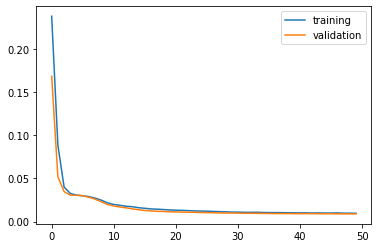

In [8]:
checker.plot_loss()

In [9]:
train_data, train_meta = checker.load_train_dataset()
train_prediction = checker.predict(train_data)


50/50 [==============================] - 63s 1s/step


In [10]:
train_meta.head()

type  fill  beam plane  q           date_time  \
7835  Inst  6892     1     h  7 2018-07-07 06:32:14   
4467  Inst  6613     1     h  7 2018-04-26 00:25:57   
3467  Inst  6215     1     h  7 2017-09-16 23:30:43   
4546  Inst  6674     1     h  7 2018-05-12 03:52:53   
6976  Inst  7117     1     h  7 2018-09-02 07:59:14   

                                                   file  n_bunches  \
7835  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6892/...       1452   
4467  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6613/...        168   
3467  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6215/...       1068   
4546  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6674/...        924   
6976  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7117/...       2556   

      bunch_index  bunch_number  ts_length  chunk  
7835        446.0         173.0      65536     30  
4467        270.0          38.0      65536     17  
3467         84.0          41.0      65536     13  
4546        367.0         247.0      65536     17  
6976       1423.0        1055.0      65536     27

In [11]:
train_meta.shape

(409600, 12)

In [12]:
train_data.shape

(409600, 2048, 1)

In [13]:
train_prediction.shape

(409600, 2048, 1)

In [14]:
validation_data, validation_meta = checker.load_validation_dataset()
validation_prediction = checker.predict(validation_data)


5/5 [==============================] - 5s 937ms/step


In [15]:
validation_meta.head()

type  fill  beam plane  q           date_time  \
7828  Inst  7487     1     h  7 2018-11-30 20:51:15   
7229  Inst  6268     1     h  7 2017-10-03 12:24:50   
1713  Inst  6936     1     h  7 2018-07-17 15:14:13   
143   Inst  7483     1     h  7 2018-11-29 12:34:15   
1804  Inst  7475     1     h  7 2018-11-26 16:46:14   

                                                   file  n_bunches  \
7828  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7487/...        733   
7229  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6268/...        300   
1713  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6936/...       1308   
143   /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7483/...        648   
1804  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7475/...        166   

      bunch_index  bunch_number  ts_length  chunk  
7828        440.0          89.0      65536     30  
7229        474.0         243.0      65536     28  
1713       1290.0         936.0      65536      6  
143        1332.0         245.0      65536      0  
1804        694.0         146.0      65536      7

In [16]:
validation_meta.shape

(40960, 12)

In [17]:
validation_data.shape

(40960, 2048, 1)

In [18]:
validation_prediction.shape

(40960, 2048, 1)

In [19]:
def plot_train_index(index: int):
    """Helper function to plot a sample from the train dataset.
    """
    true_signal = train_data[index]
    predicted_signal = train_prediction[index]
    metadata_row = train_meta.iloc[index]
    print(f"index: {index}")
    print(f"Error: {train_error[index]}")
    print(metadata_row)
    checker.plot_sample(metadata_row, true_signal, predicted_signal)
    plt.show()
    encoded = checker.encode(true_signal)
    plt.imshow(encoded)
    plt.show()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

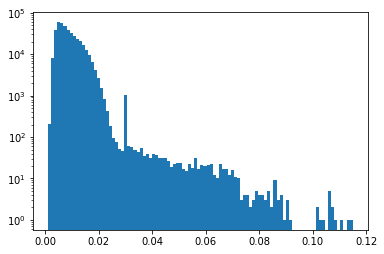

In [20]:
train_error = checker.MSE(train_data, train_prediction)
checker.plot_error(train_error, bins=100)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

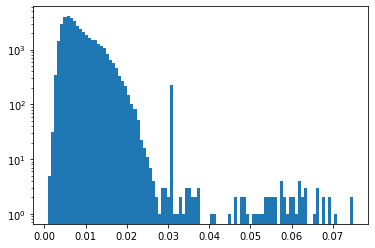

In [21]:
validation_error = checker.MSE(validation_data, validation_prediction)
checker.plot_error(validation_error, bins=100)

In [22]:
# Histogram peak
hist, bins = np.histogram(train_error, bins=100)
hist_peak = bins[np.argmax(hist)]

index: 0
Error: 0.01399831799829177
type                                                         Inst
fill                                                         6892
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-07 06:32:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6892/...
n_bunches                                                    1452
bunch_index                                                   446
bunch_number                                                  173
ts_length                                                   65536
chunk                                                          30
Name: 7835, dtype: object


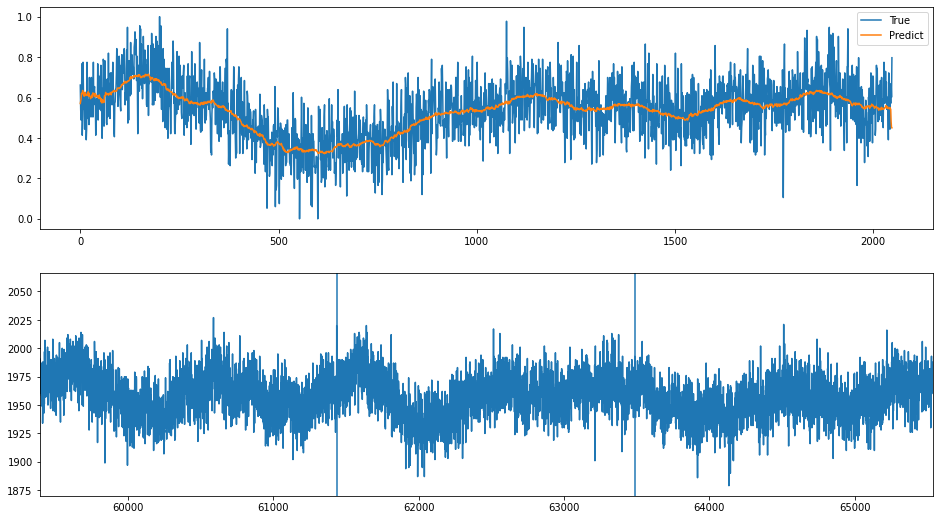

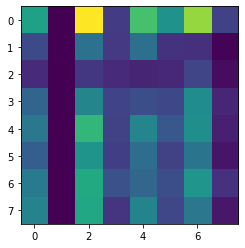

In [23]:
# plotting a random sample
plot_train_index(0)

In [24]:
sorted_error_indices = np.argsort(train_error)

# From left to right

index: 133594
Error: 0.0011816196029177186
type                                                         Inst
fill                                                         6192
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-12 17:15:33
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6192/...
n_bunches                                                     460
bunch_index                                                   762
bunch_number                                                  408
ts_length                                                   65536
chunk                                                           7
Name: 1966, dtype: object


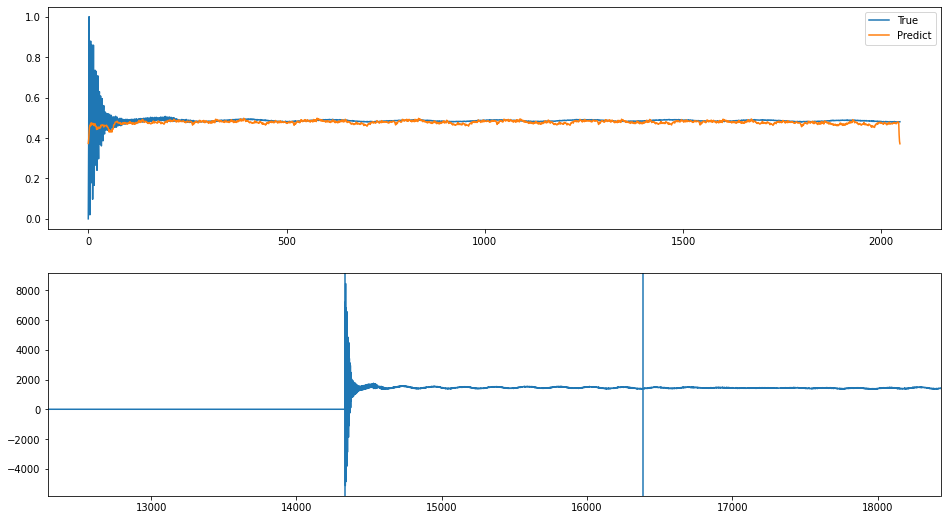

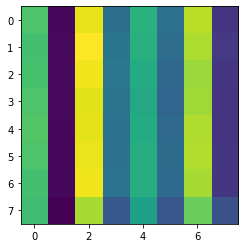

index: 248598
Error: 0.0013041736321087898
type                                                         Inst
fill                                                         6351
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-31 15:08:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6351/...
n_bunches                                                     300
bunch_index                                                   508
bunch_number                                                  275
ts_length                                                   65536
chunk                                                           6
Name: 1665, dtype: object


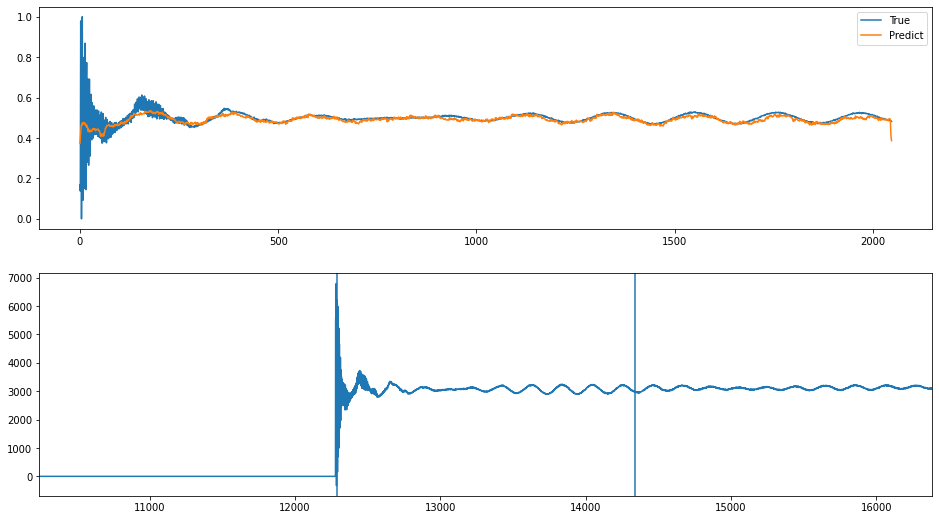

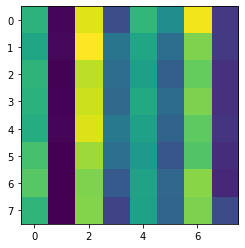

index: 302554
Error: 0.001370815590751112
type                                                         Inst
fill                                                         6384
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-12 19:12:42
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6384/...
n_bunches                                                     524
bunch_index                                                  1206
bunch_number                                                  403
ts_length                                                   65536
chunk                                                           6
Name: 1733, dtype: object


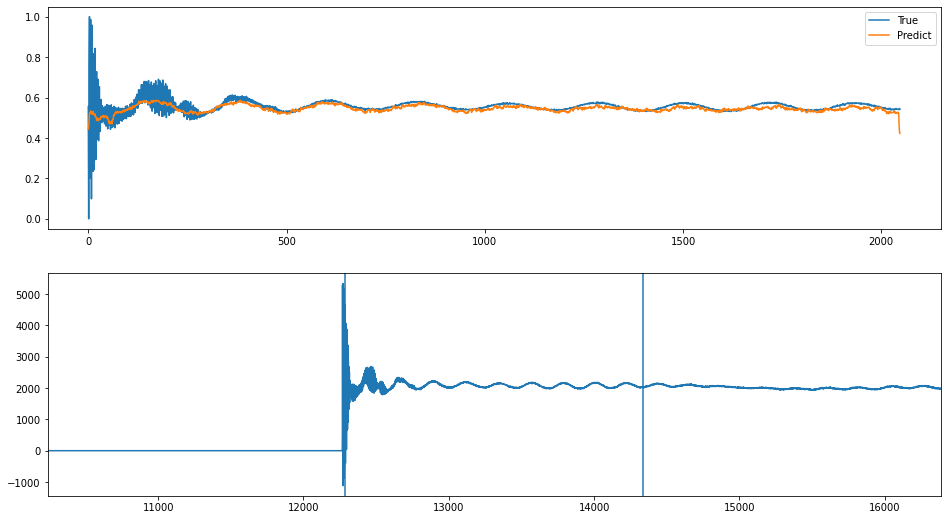

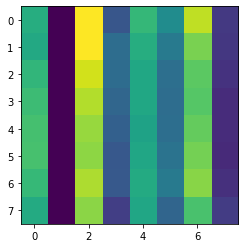

index: 297648
Error: 0.0014285026574143841
type                                                         Inst
fill                                                         6194
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-13 08:11:29
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6194/...
n_bunches                                                     176
bunch_index                                                  2085
bunch_number                                                  130
ts_length                                                   65536
chunk                                                           5
Name: 1488, dtype: object


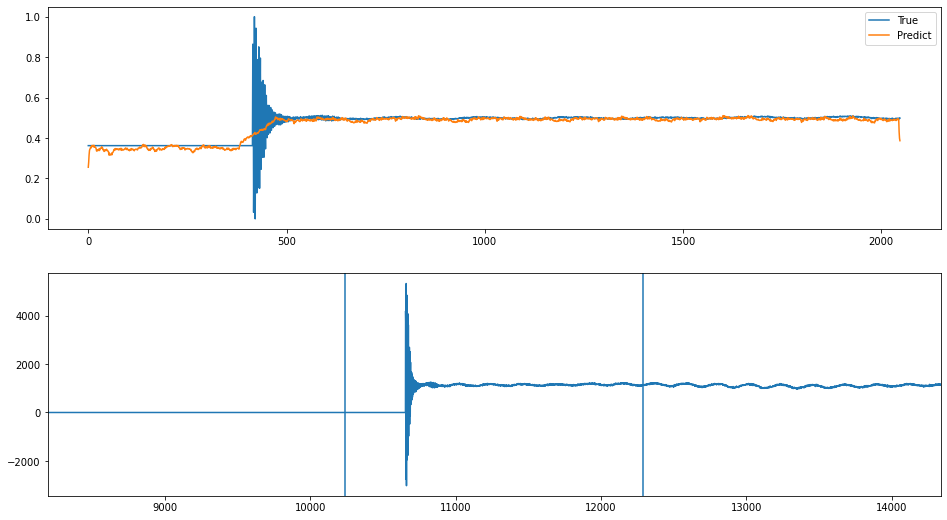

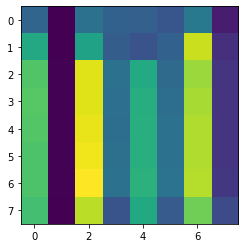

index: 334577
Error: 0.0014304478704815899
type                                                         Inst
fill                                                         6193
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-12 23:20:07
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6193/...
n_bunches                                                     684
bunch_index                                                  1105
bunch_number                                                  598
ts_length                                                   65536
chunk                                                           4
Name: 1168, dtype: object


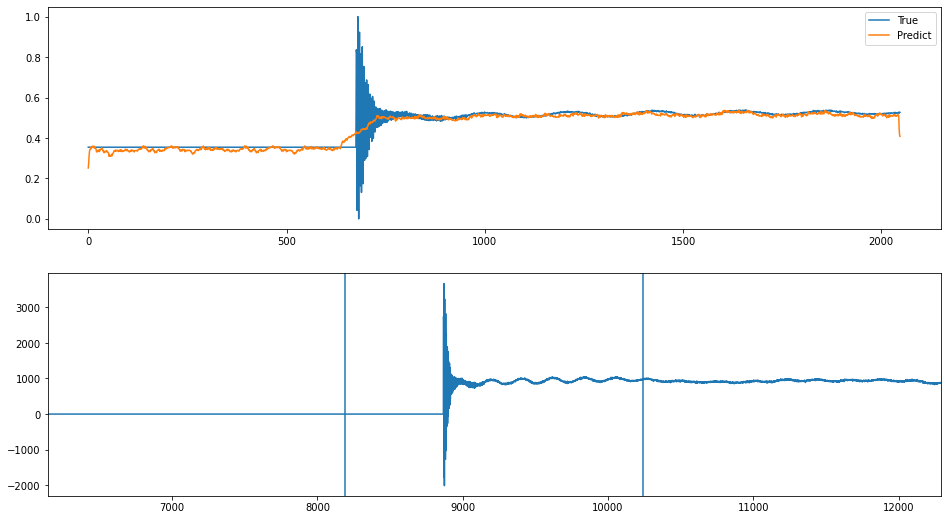

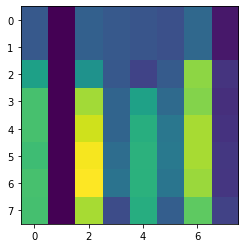

index: 226889
Error: 0.001469022150495984
type                                                         Inst
fill                                                         6252
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-27 21:28:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6252/...
n_bunches                                                     796
bunch_index                                                  1400
bunch_number                                                  772
ts_length                                                   65536
chunk                                                           3
Name: 1000, dtype: object


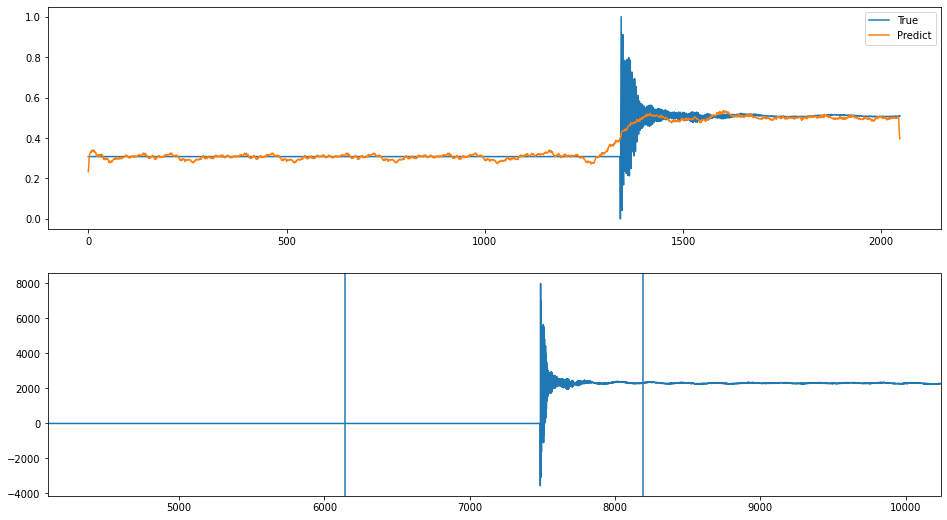

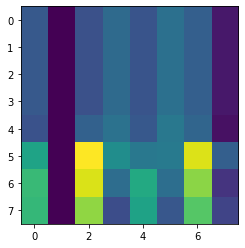

index: 73168
Error: 0.001470807882837688
type                                                         Inst
fill                                                         6215
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-16 23:32:05
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6215/...
n_bunches                                                    1212
bunch_index                                                  1534
bunch_number                                                 1134
ts_length                                                   65536
chunk                                                           4
Name: 1172, dtype: object


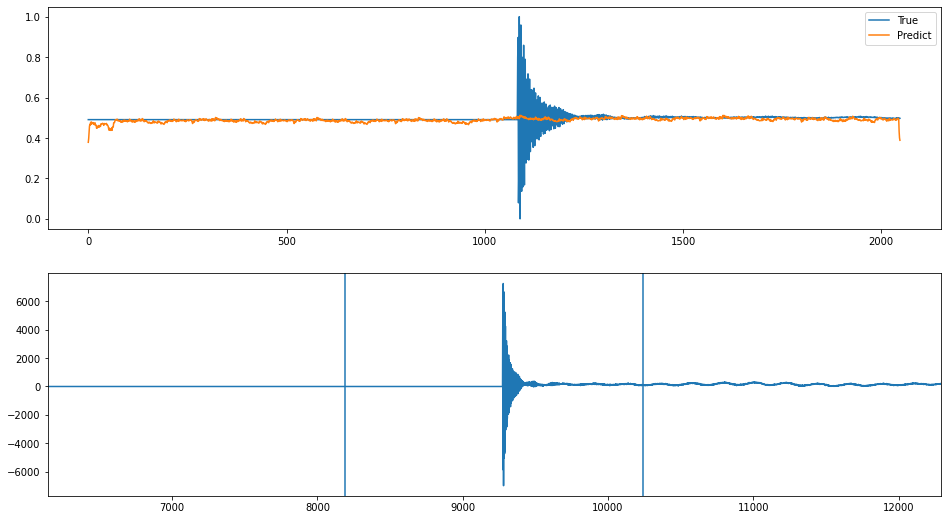

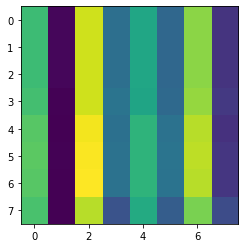

index: 131320
Error: 0.0014802638618608747
type                                                         Inst
fill                                                         7346
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 08:03:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7346/...
n_bunches                                                    1068
bunch_index                                                  1292
bunch_number                                                  938
ts_length                                                   65536
chunk                                                          10
Name: 2575, dtype: object


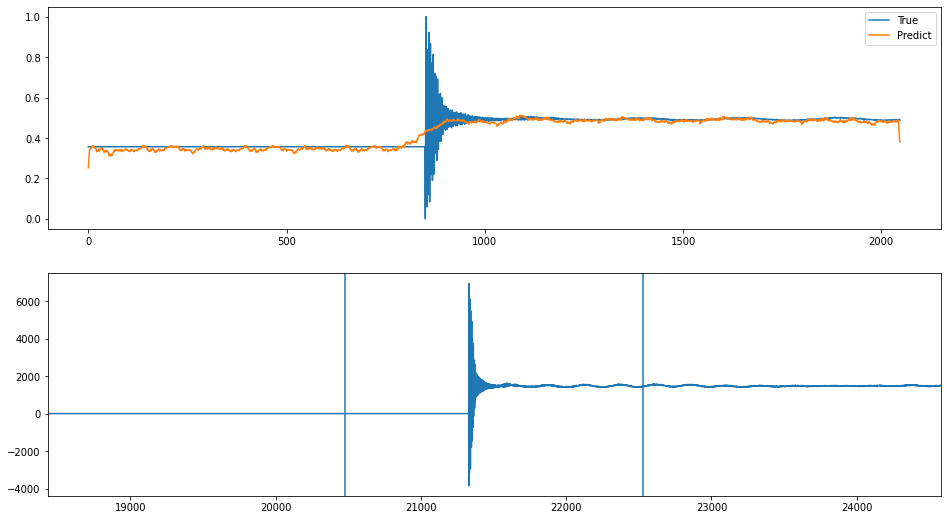

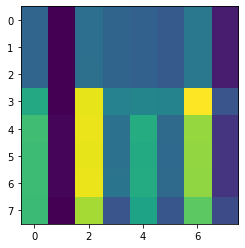

index: 361456
Error: 0.0014930456944722398
type                                                         Inst
fill                                                         6184
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-09 23:52:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6184/...
n_bunches                                                    1188
bunch_index                                                  2021
bunch_number                                                 1108
ts_length                                                   65536
chunk                                                          13
Name: 3400, dtype: object


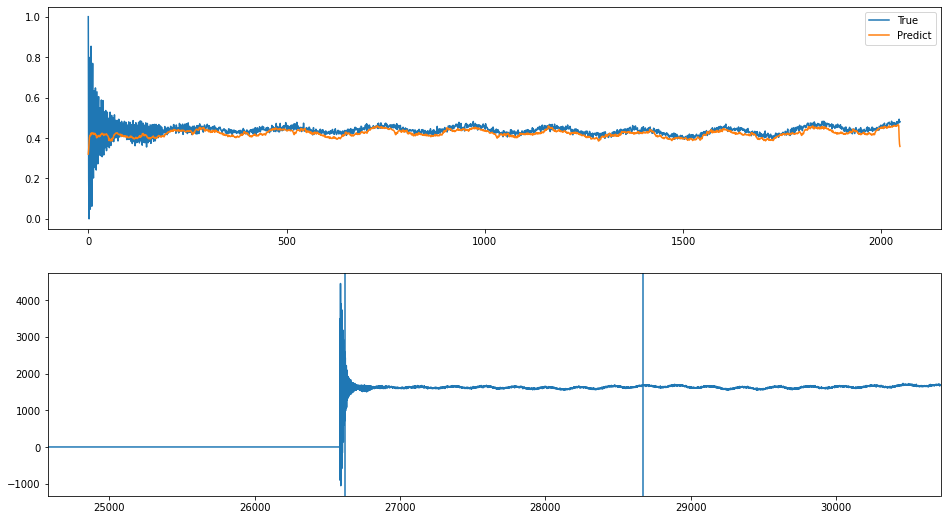

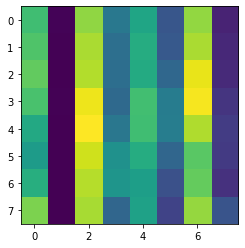

index: 312979
Error: 0.0014987169698564109
type                                                         Inst
fill                                                         7333
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-22 22:15:05
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7333/...
n_bunches                                                     924
bunch_index                                                  1220
bunch_number                                                  897
ts_length                                                   65536
chunk                                                          11
Name: 2879, dtype: object


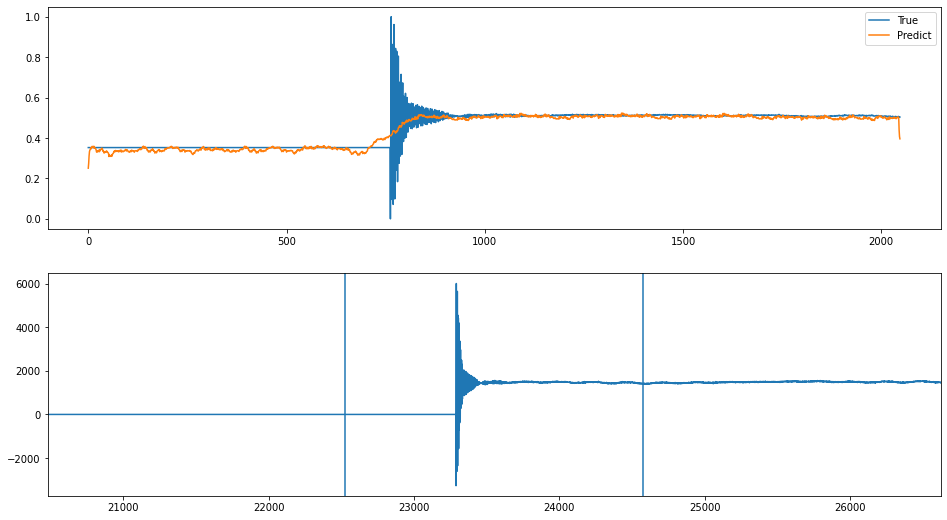

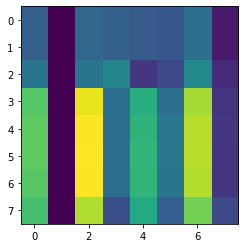

In [25]:
for i in range(10):
    index = sorted_error_indices[i]
    plot_train_index(index)

# From right to left

index: 89342
Error: 0.11493494200520259
type                                                         Inst
fill                                                         6518
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-07 03:03:02
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6518/...
n_bunches                                                       1
bunch_index                                                   100
bunch_number                                                    0
ts_length                                                   65536
chunk                                                          14
Name: 3816, dtype: object


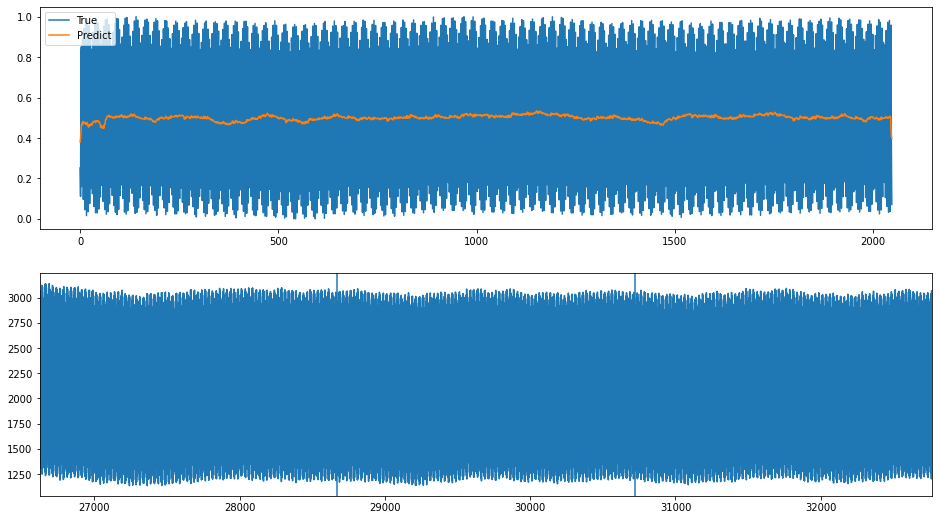

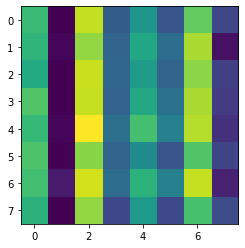

index: 88173
Error: 0.11377920498636829
type                                                         Inst
fill                                                         6518
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-07 03:03:02
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6518/...
n_bunches                                                       1
bunch_index                                                   100
bunch_number                                                    0
ts_length                                                   65536
chunk                                                          15
Name: 4072, dtype: object


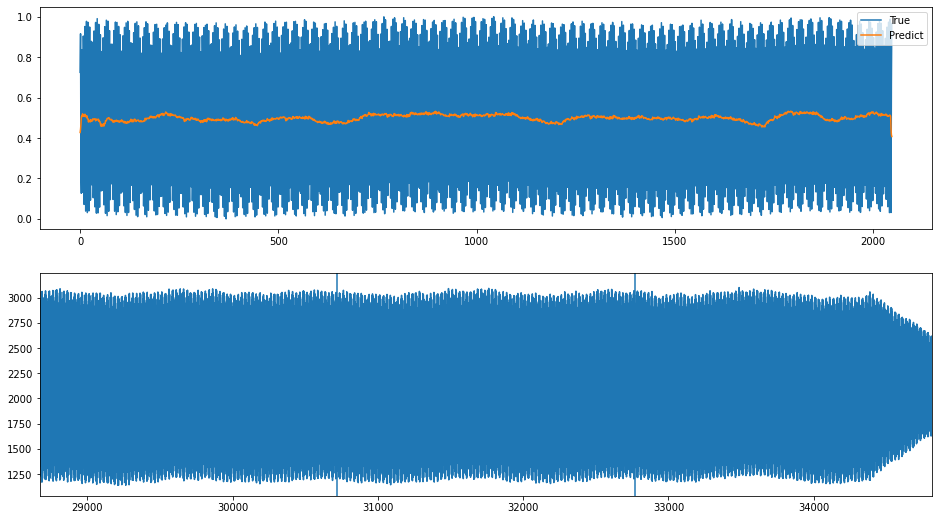

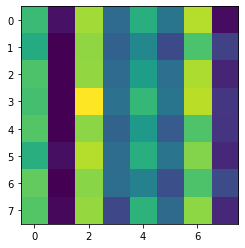

index: 88836
Error: 0.11069267490018453
type                                                         Inst
fill                                                         6518
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-07 03:03:02
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6518/...
n_bunches                                                       1
bunch_index                                                   100
bunch_number                                                    0
ts_length                                                   65536
chunk                                                          13
Name: 3560, dtype: object


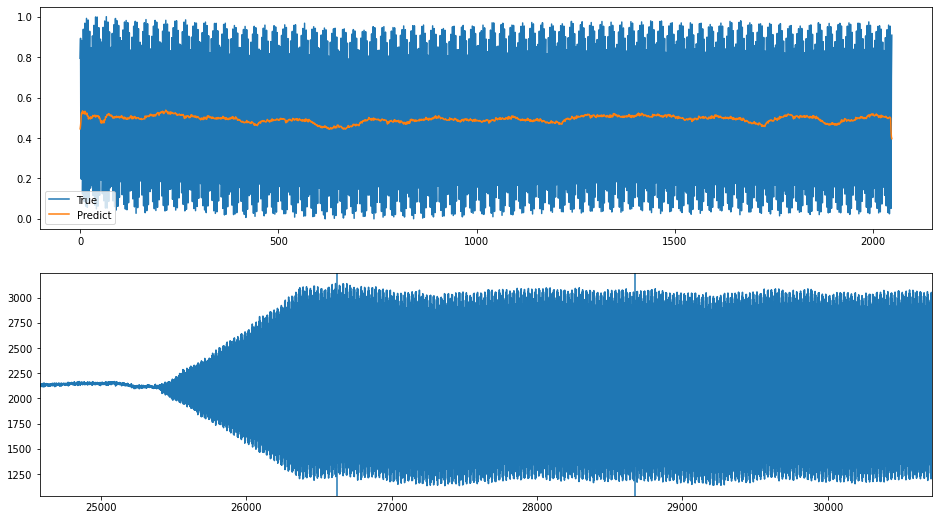

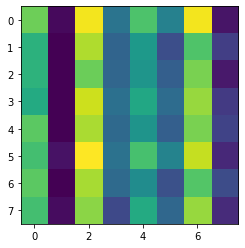

index: 226735
Error: 0.10861563913254225
type                                                         Inst
fill                                                         6275
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 20:43:51
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6275/...
n_bunches                                                    1868
bunch_index                                                     2
bunch_number                                                    2
ts_length                                                   65536
chunk                                                          13
Name: 3367, dtype: object


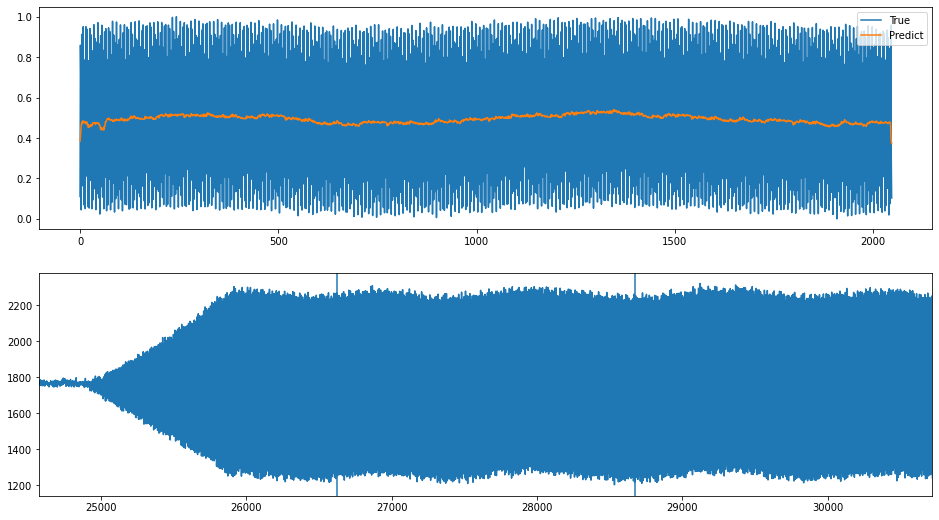

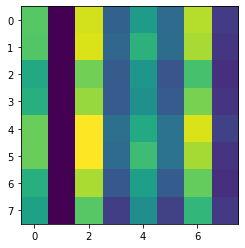

index: 226622
Error: 0.10767323030641648
type                                                         Inst
fill                                                         6275
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 20:43:51
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6275/...
n_bunches                                                    1868
bunch_index                                                     2
bunch_number                                                    2
ts_length                                                   65536
chunk                                                          14
Name: 3623, dtype: object


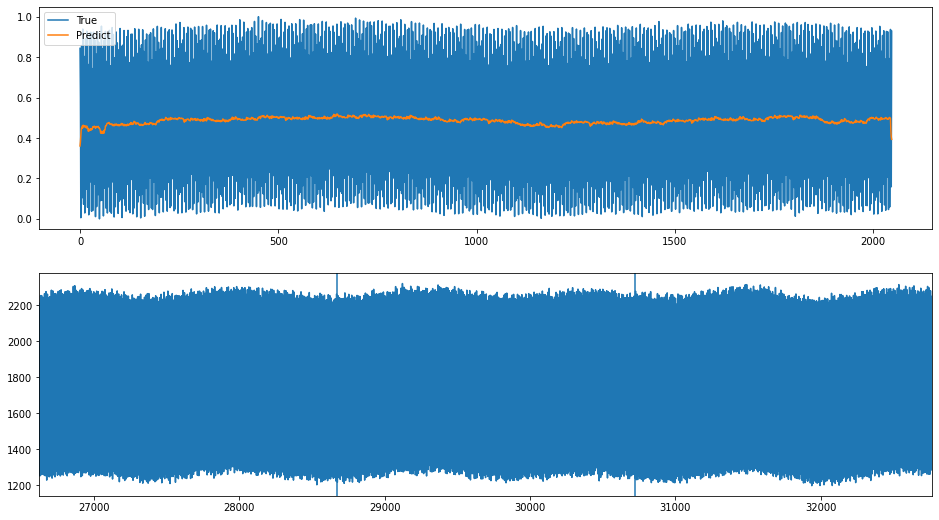

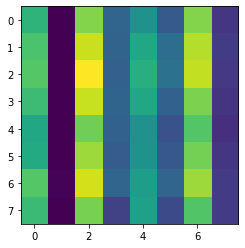

index: 130468
Error: 0.10759450436354631
type                                                         Inst
fill                                                         6960
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-22 18:00:21
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6960/...
n_bunches                                                    2556
bunch_index                                                    29
bunch_number                                                   11
ts_length                                                   65536
chunk                                                          12
Name: 3229, dtype: object


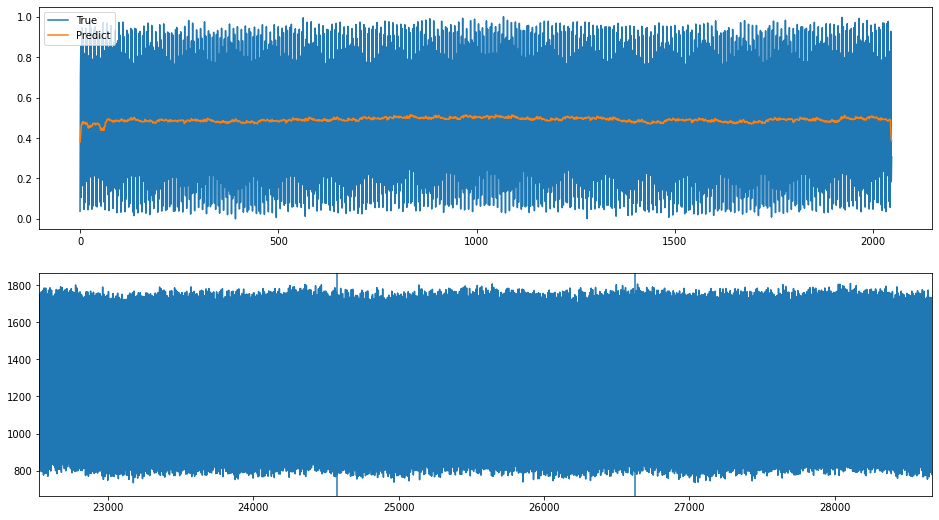

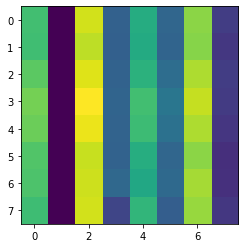

index: 228831
Error: 0.10693052737046861
type                                                         Inst
fill                                                         6275
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 20:43:51
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6275/...
n_bunches                                                    1868
bunch_index                                                     2
bunch_number                                                    2
ts_length                                                   65536
chunk                                                          15
Name: 3879, dtype: object


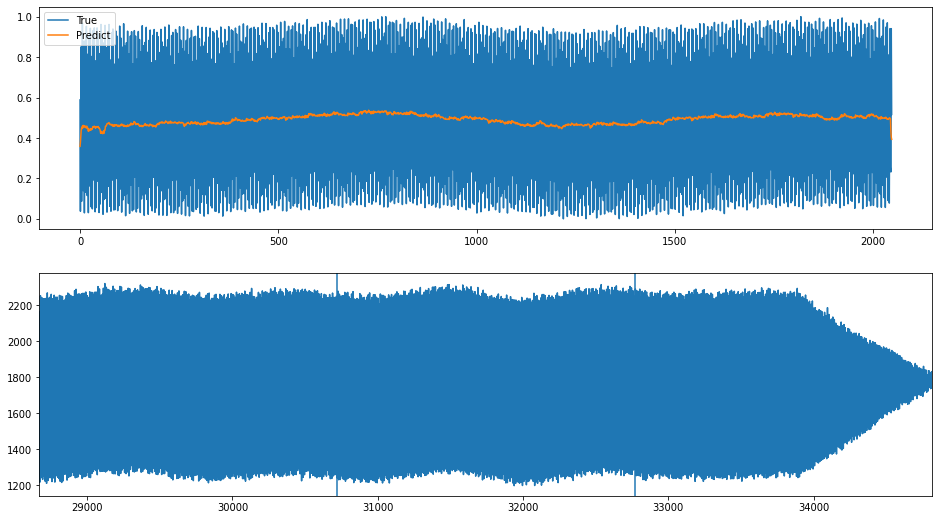

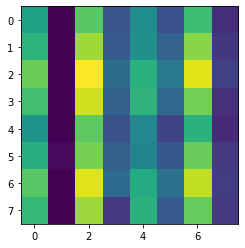

index: 125400
Error: 0.10675644168126414
type                                                         Inst
fill                                                         6960
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-22 18:00:21
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6960/...
n_bunches                                                    2556
bunch_index                                                    29
bunch_number                                                   11
ts_length                                                   65536
chunk                                                          11
Name: 2973, dtype: object


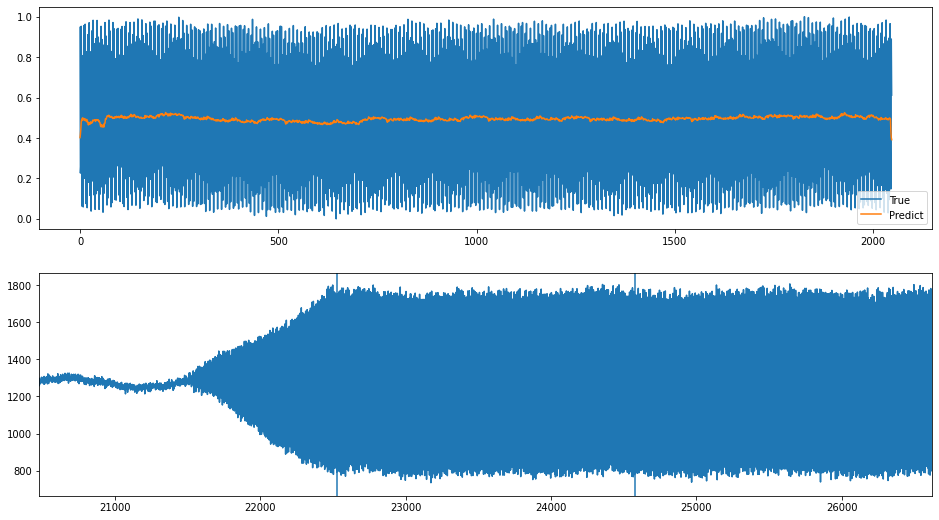

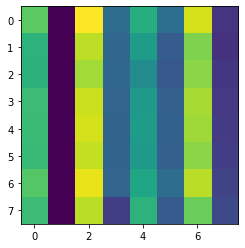

index: 128230
Error: 0.10664676105601148
type                                                         Inst
fill                                                         6960
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-22 18:00:21
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6960/...
n_bunches                                                    2556
bunch_index                                                    29
bunch_number                                                   11
ts_length                                                   65536
chunk                                                          13
Name: 3485, dtype: object


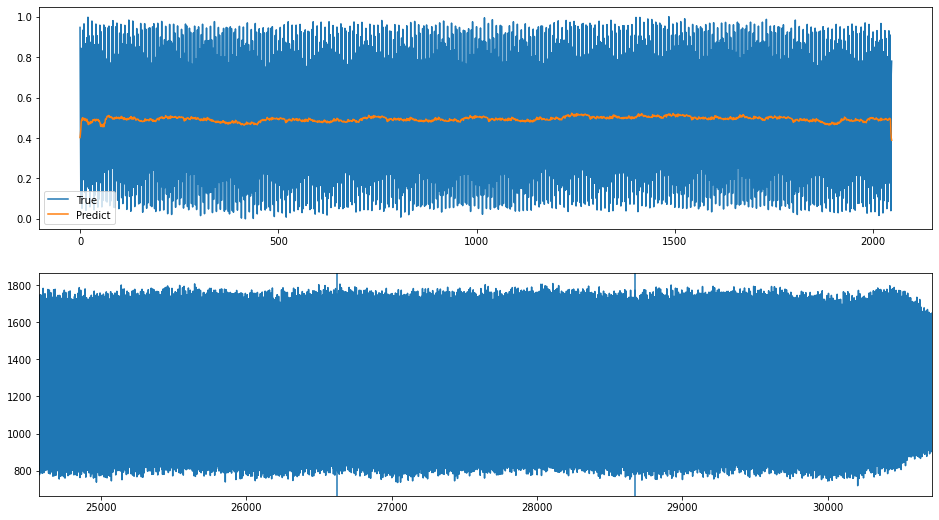

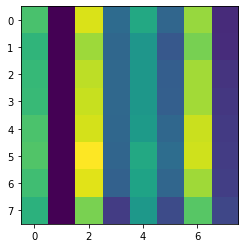

index: 268328
Error: 0.1059508410398149
type                                                         Inst
fill                                                         6837
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-25 00:46:55
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6837/...
n_bunches                                                       2
bunch_index                                                     0
bunch_number                                                    0
ts_length                                                   65536
chunk                                                          12
Name: 3160, dtype: object


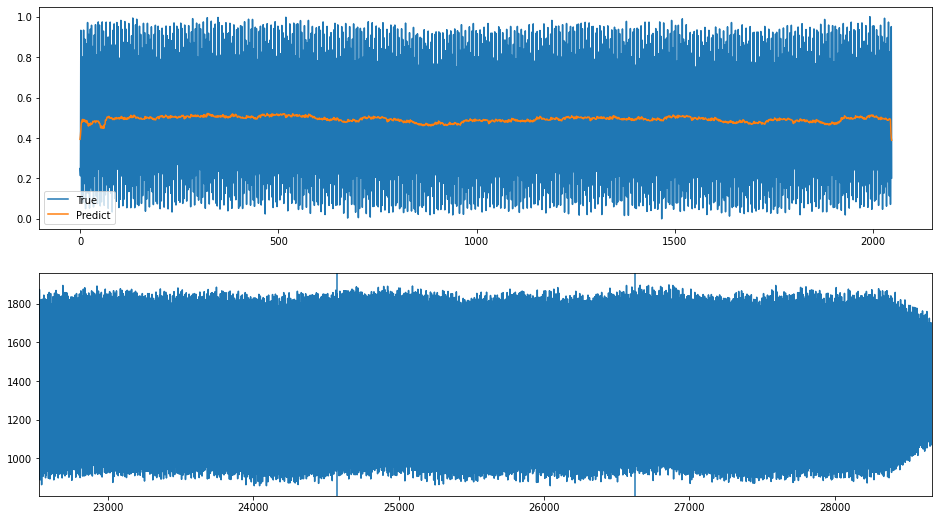

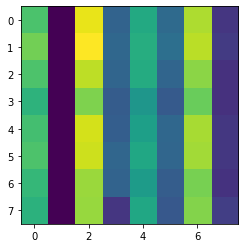

index: 268753
Error: 0.10590185576058131
type                                                         Inst
fill                                                         6837
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-25 00:46:55
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6837/...
n_bunches                                                       2
bunch_index                                                     0
bunch_number                                                    0
ts_length                                                   65536
chunk                                                          11
Name: 2904, dtype: object


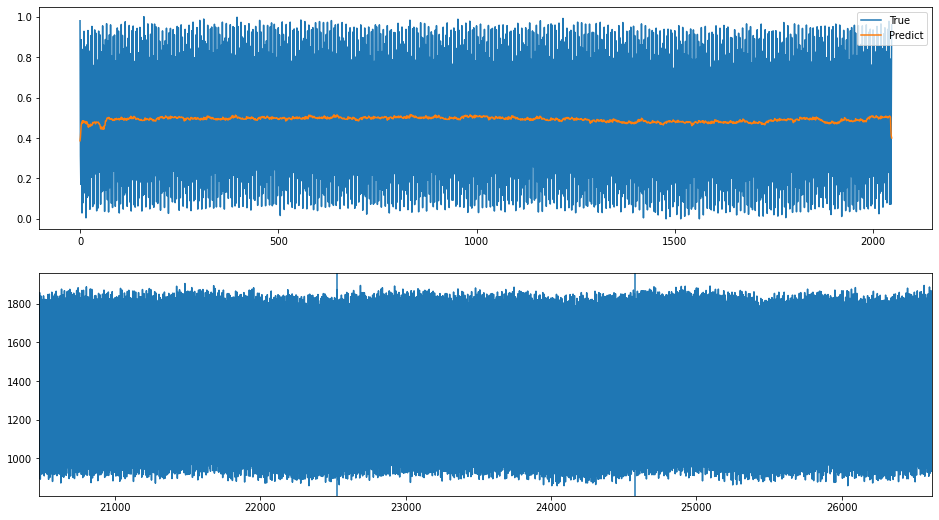

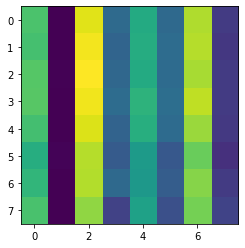

index: 263891
Error: 0.10383660129682235
type                                                         Inst
fill                                                         6837
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-25 00:46:55
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6837/...
n_bunches                                                       2
bunch_index                                                     0
bunch_number                                                    0
ts_length                                                   65536
chunk                                                          10
Name: 2648, dtype: object


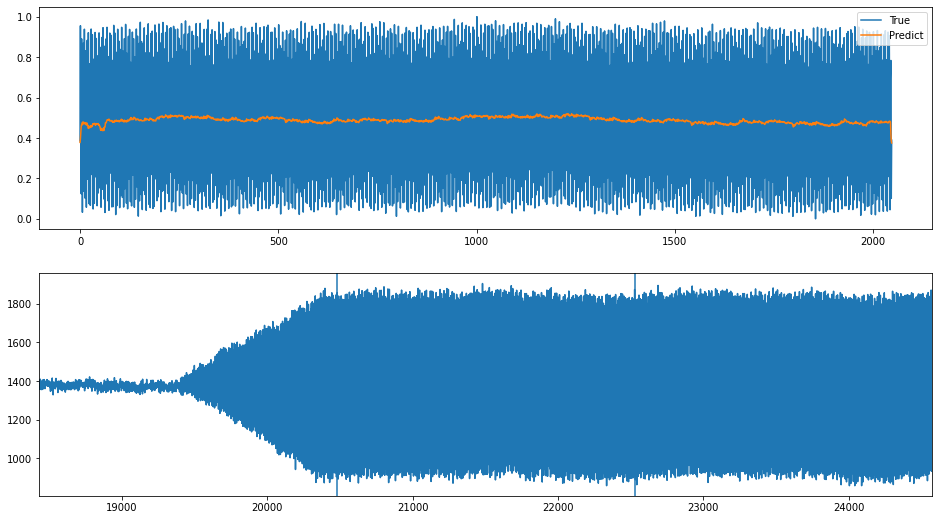

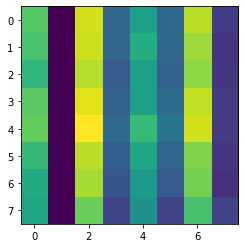

index: 264272
Error: 0.10293480977624289
type                                                         Inst
fill                                                         6837
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-25 00:46:55
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6837/...
n_bunches                                                       2
bunch_index                                                     0
bunch_number                                                    0
ts_length                                                   65536
chunk                                                          13
Name: 3416, dtype: object


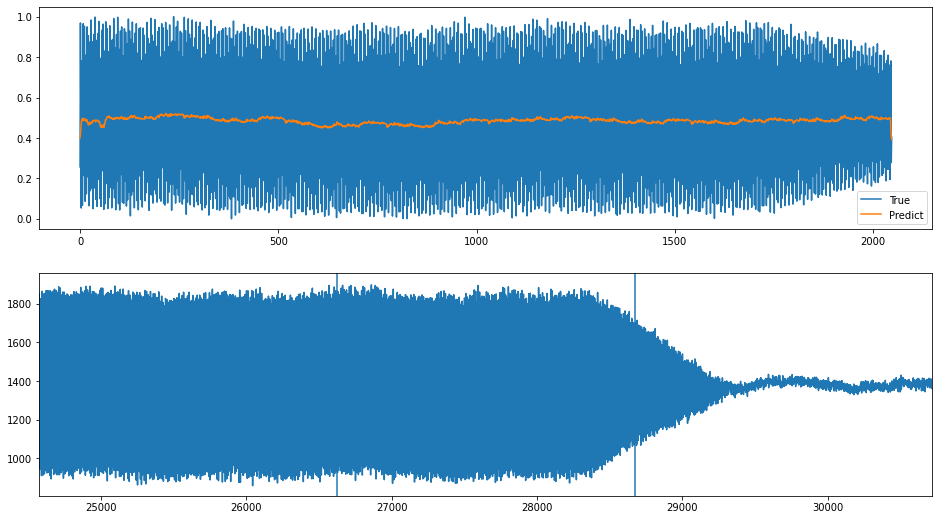

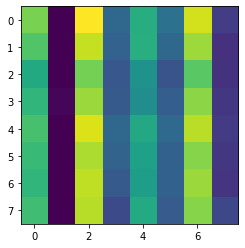

index: 82460
Error: 0.10230380186413057
type                                                         Inst
fill                                                         6518
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-07 03:03:02
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6518/...
n_bunches                                                       1
bunch_index                                                   100
bunch_number                                                    0
ts_length                                                   65536
chunk                                                          16
Name: 4328, dtype: object


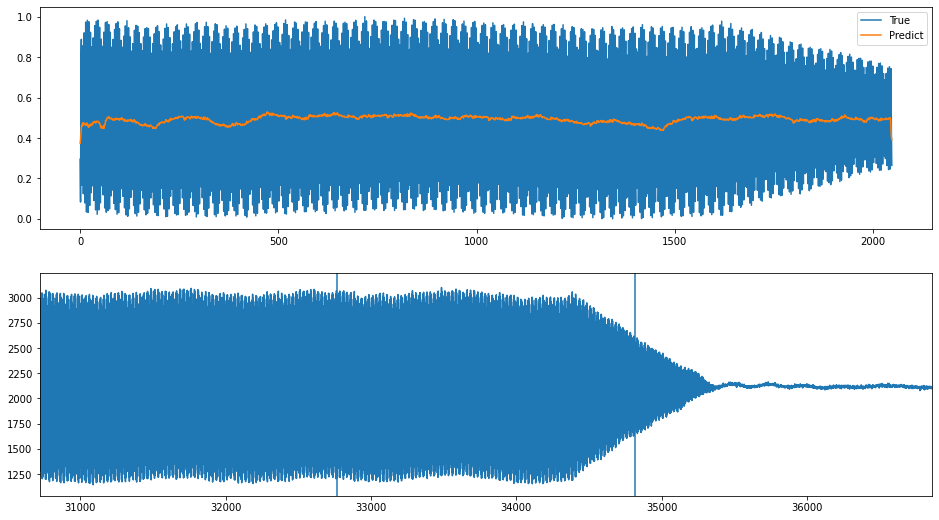

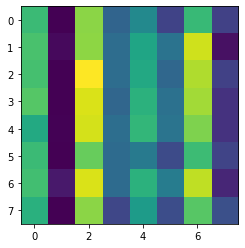

index: 130784
Error: 0.10188111889667728
type                                                         Inst
fill                                                         6960
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-22 18:00:21
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6960/...
n_bunches                                                    2556
bunch_index                                                    29
bunch_number                                                   11
ts_length                                                   65536
chunk                                                          14
Name: 3741, dtype: object


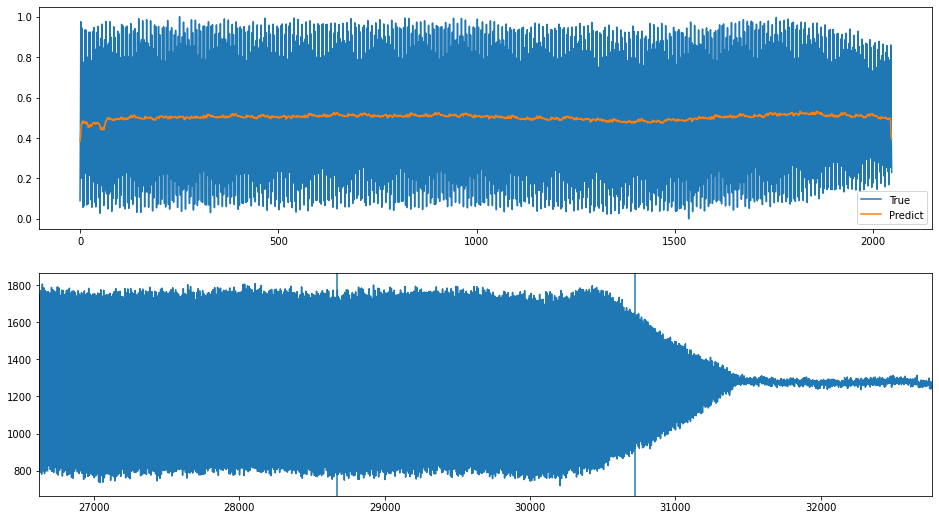

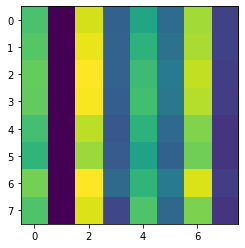

index: 319744
Error: 0.09170561554627142
type                                                         Inst
fill                                                         7357
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 03:27:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7357/...
n_bunches                                                      37
bunch_index                                                  2208
bunch_number                                                   33
ts_length                                                   65536
chunk                                                           2
Name: 604, dtype: object


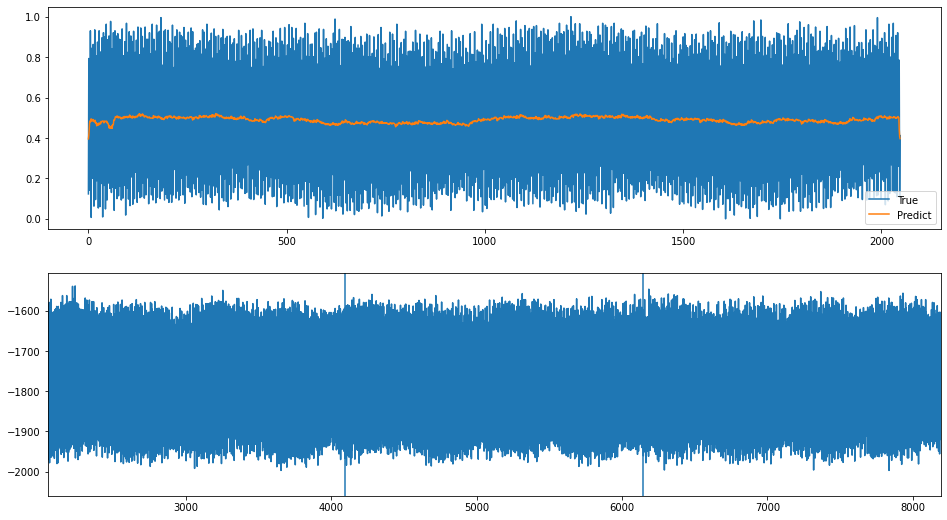

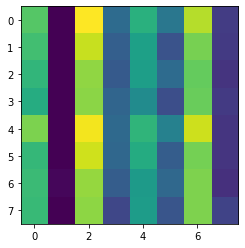

index: 368846
Error: 0.09091355653602515
type                                                         Inst
fill                                                         6624
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-30 00:39:29
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6624/...
n_bunches                                                     168
bunch_index                                                   180
bunch_number                                                   56
ts_length                                                   65536
chunk                                                          16
Name: 4183, dtype: object


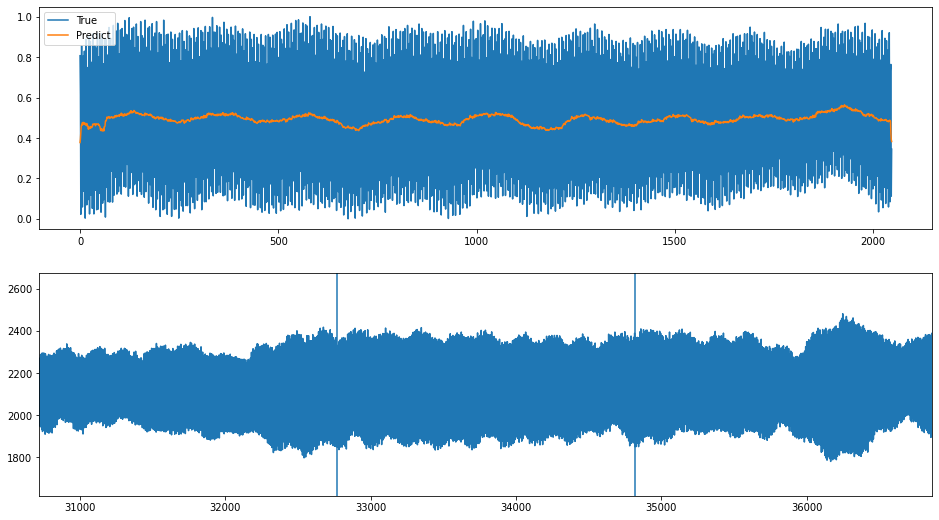

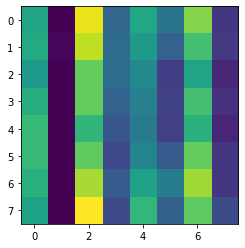

index: 325648
Error: 0.09005249858810482
type                                                         Inst
fill                                                         7357
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 03:27:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7357/...
n_bunches                                                      37
bunch_index                                                  2208
bunch_number                                                   33
ts_length                                                   65536
chunk                                                           8
Name: 2140, dtype: object


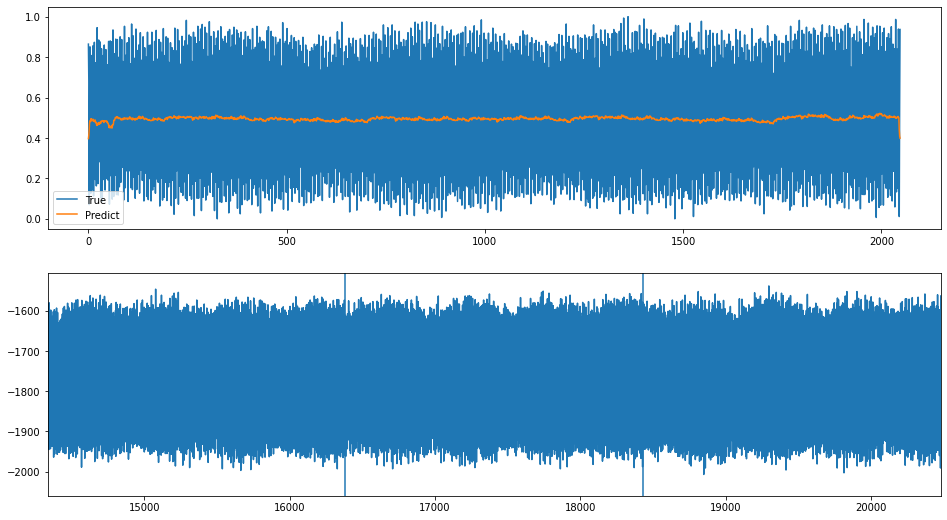

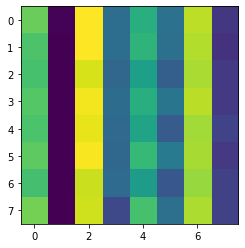

index: 326032
Error: 0.08995594935575912
type                                                         Inst
fill                                                         7357
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 03:27:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7357/...
n_bunches                                                      37
bunch_index                                                  2208
bunch_number                                                   33
ts_length                                                   65536
chunk                                                          31
Name: 8028, dtype: object


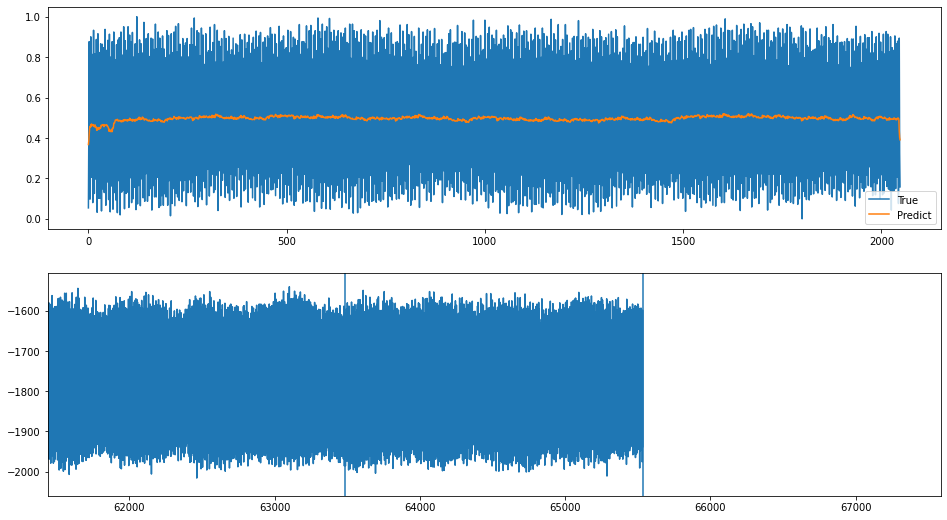

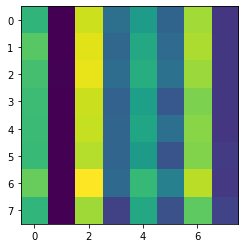

index: 326272
Error: 0.0892695656919699
type                                                         Inst
fill                                                         7357
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 03:27:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7357/...
n_bunches                                                      37
bunch_index                                                  2208
bunch_number                                                   33
ts_length                                                   65536
chunk                                                           6
Name: 1628, dtype: object


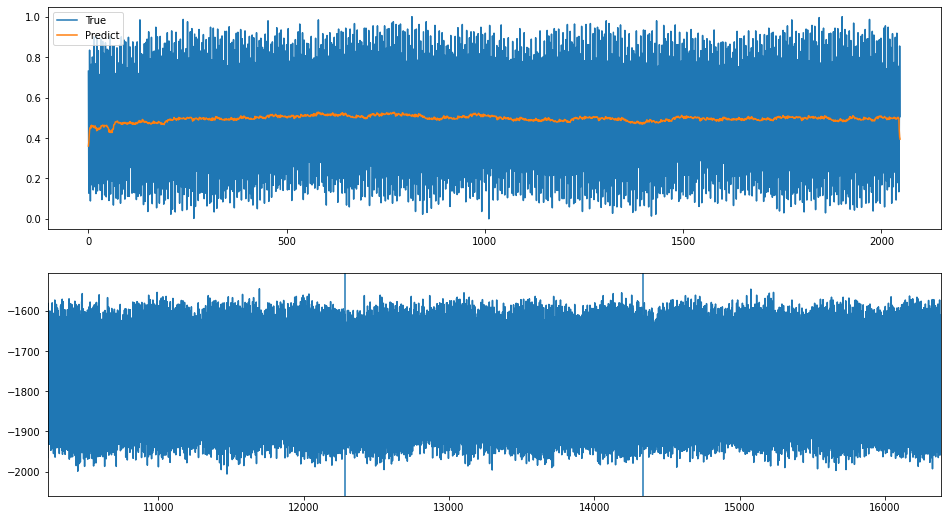

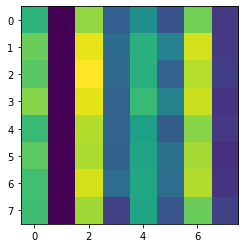

index: 320701
Error: 0.08868233084459219
type                                                         Inst
fill                                                         7357
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 03:27:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7357/...
n_bunches                                                      37
bunch_index                                                  2208
bunch_number                                                   33
ts_length                                                   65536
chunk                                                          20
Name: 5212, dtype: object


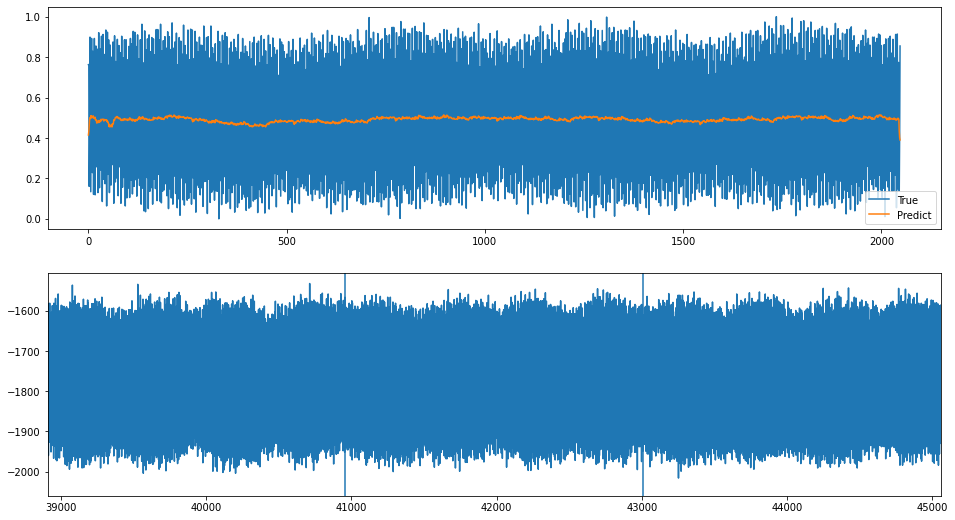

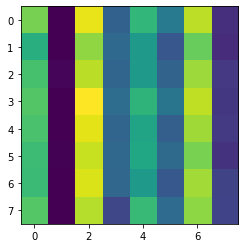

index: 221862
Error: 0.08848032201990547
type                                                         Inst
fill                                                         6809
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-16 05:58:09
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6809/...
n_bunches                                                     156
bunch_index                                                   223
bunch_number                                                   40
ts_length                                                   65536
chunk                                                          14
Name: 3828, dtype: object


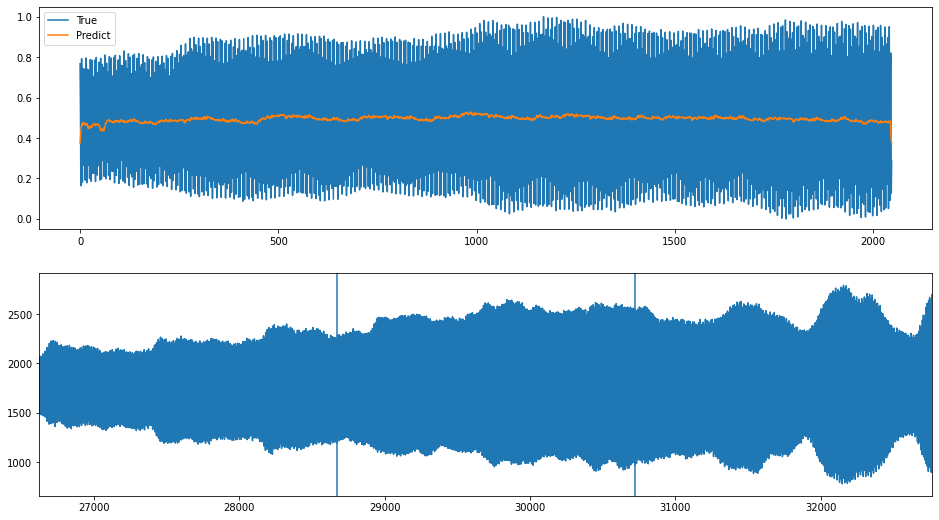

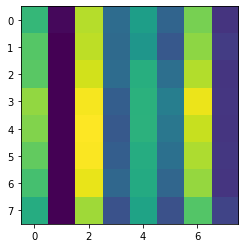

index: 324752
Error: 0.08821775846530411
type                                                         Inst
fill                                                         7357
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 03:27:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7357/...
n_bunches                                                      37
bunch_index                                                  2208
bunch_number                                                   33
ts_length                                                   65536
chunk                                                          14
Name: 3676, dtype: object


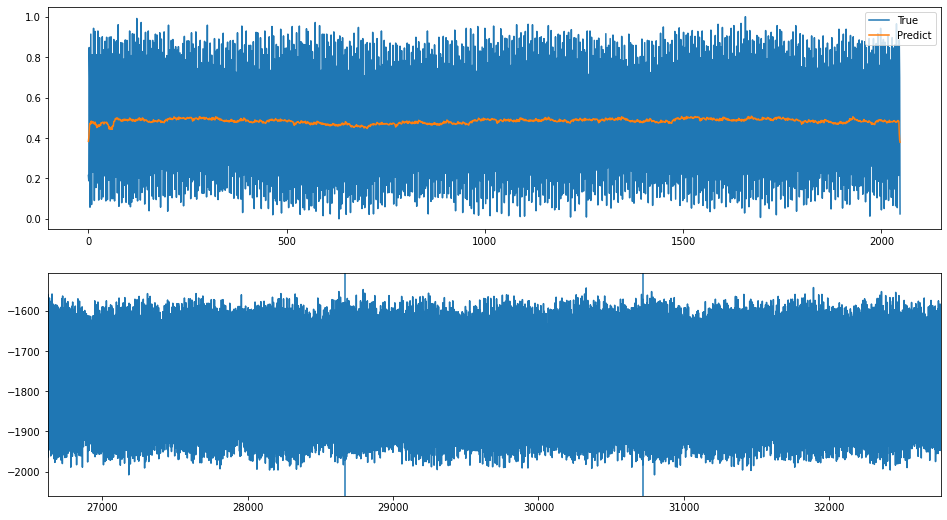

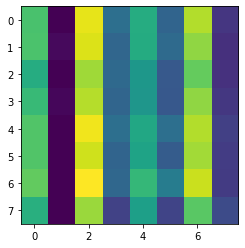

index: 228486
Error: 0.08813264380602256
type                                                         Inst
fill                                                         6719
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-25 00:11:40
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6719/...
n_bunches                                                     252
bunch_index                                                   108
bunch_number                                                   40
ts_length                                                   65536
chunk                                                          14
Name: 3830, dtype: object


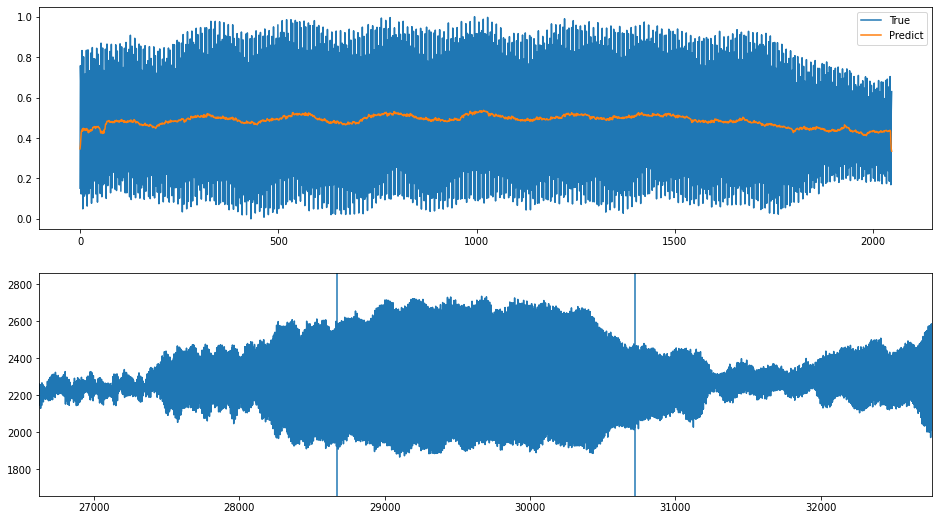

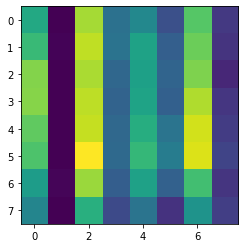

index: 320877
Error: 0.08758914168439759
type                                                         Inst
fill                                                         7357
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 03:27:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7357/...
n_bunches                                                      37
bunch_index                                                  2208
bunch_number                                                   33
ts_length                                                   65536
chunk                                                          12
Name: 3164, dtype: object


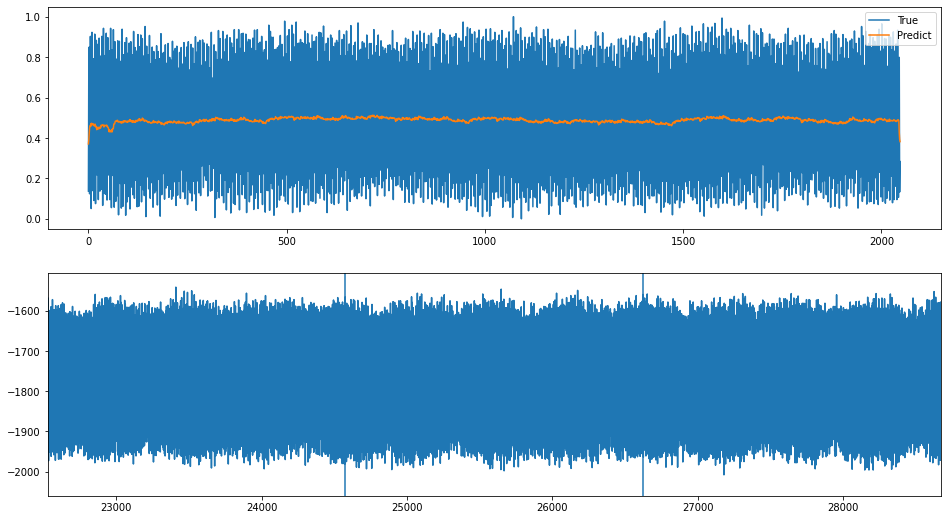

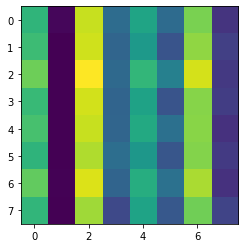

index: 321648
Error: 0.08708426648207956
type                                                         Inst
fill                                                         7357
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 03:27:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7357/...
n_bunches                                                      37
bunch_index                                                  2208
bunch_number                                                   33
ts_length                                                   65536
chunk                                                          23
Name: 5980, dtype: object


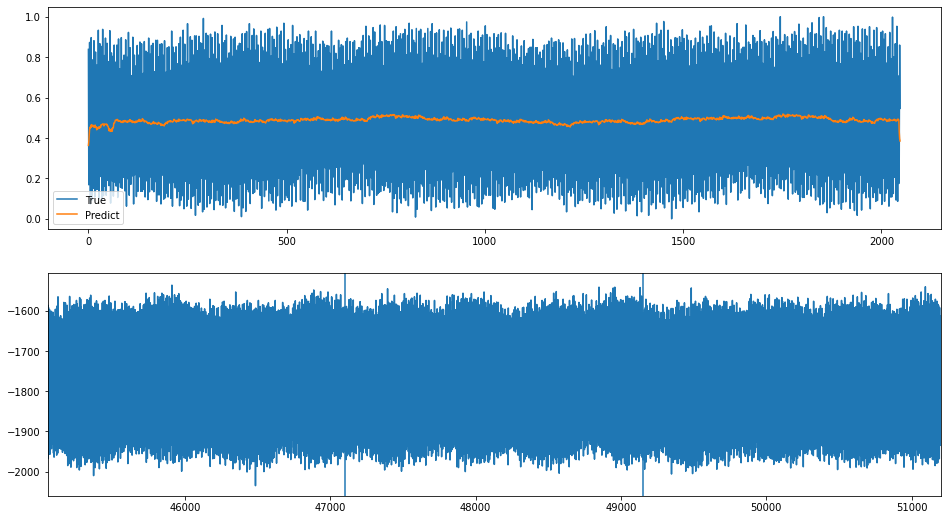

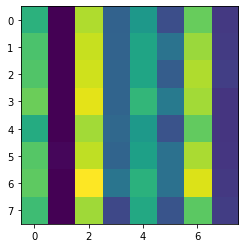

index: 327456
Error: 0.08650992177865935
type                                                         Inst
fill                                                         7357
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 03:27:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7357/...
n_bunches                                                      37
bunch_index                                                  2208
bunch_number                                                   33
ts_length                                                   65536
chunk                                                          24
Name: 6236, dtype: object


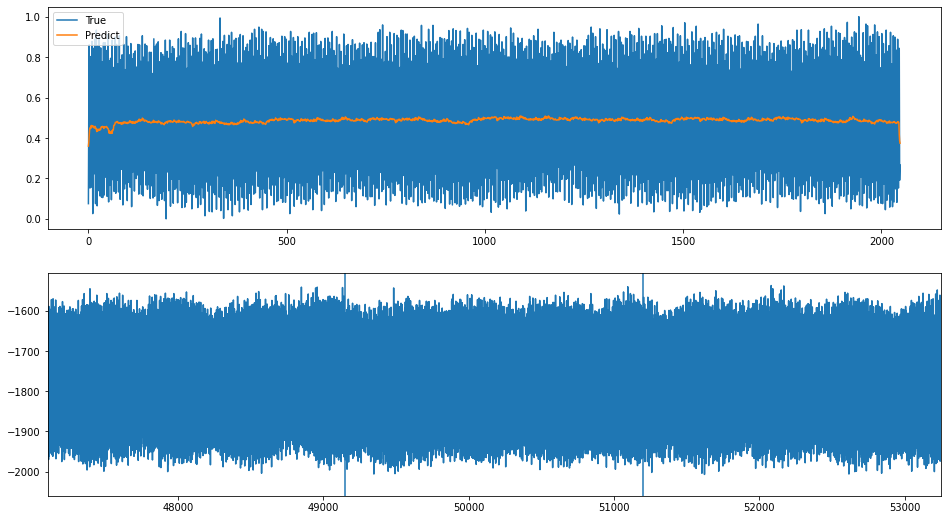

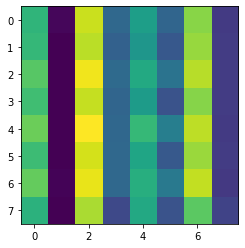

index: 326704
Error: 0.08643431786465039
type                                                         Inst
fill                                                         7357
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 03:27:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7357/...
n_bunches                                                      37
bunch_index                                                  2208
bunch_number                                                   33
ts_length                                                   65536
chunk                                                          26
Name: 6748, dtype: object


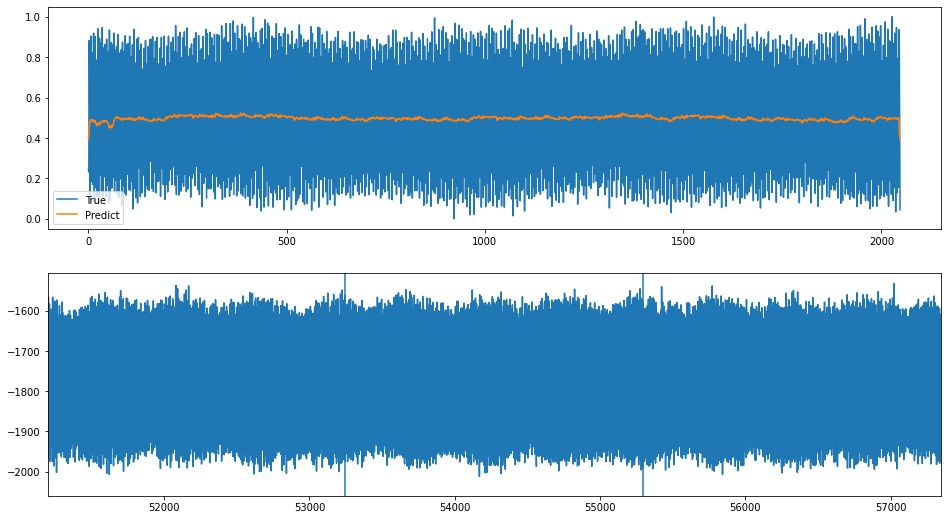

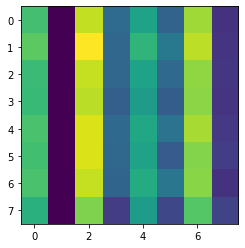

index: 320638
Error: 0.08642636880081278
type                                                         Inst
fill                                                         7357
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 03:27:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7357/...
n_bunches                                                      37
bunch_index                                                  2208
bunch_number                                                   33
ts_length                                                   65536
chunk                                                          16
Name: 4188, dtype: object


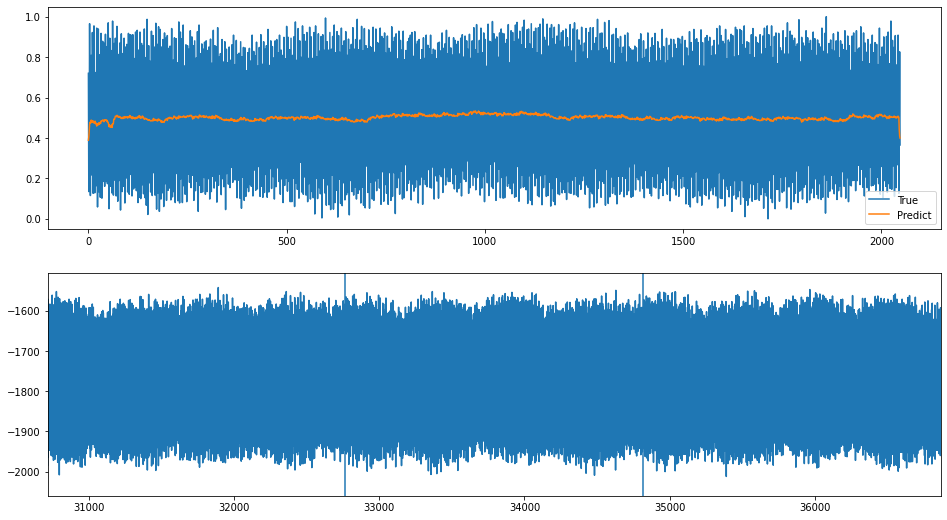

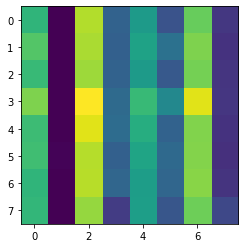

index: 184965
Error: 0.08624739991542973
type                                                         Inst
fill                                                         6924
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-15 08:11:39
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6924/...
n_bunches                                                     252
bunch_index                                                    85
bunch_number                                                   36
ts_length                                                   65536
chunk                                                           5
Name: 1489, dtype: object


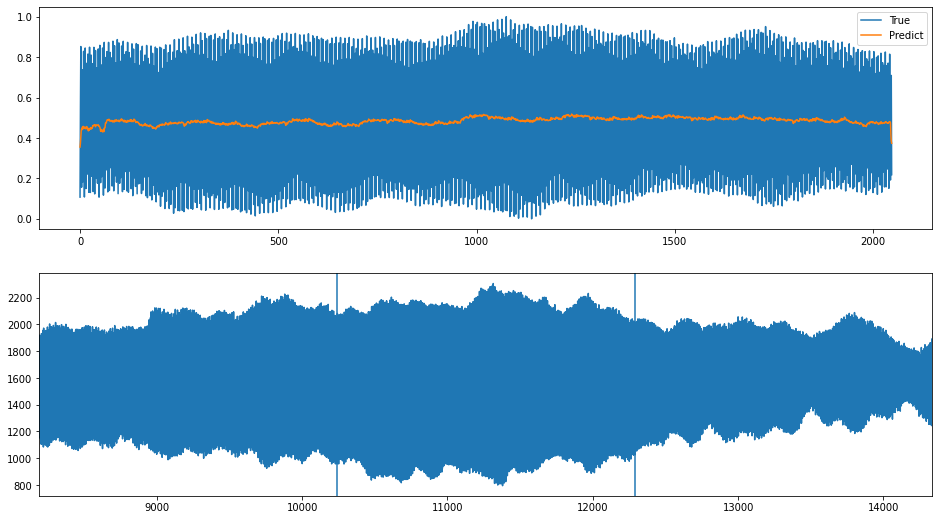

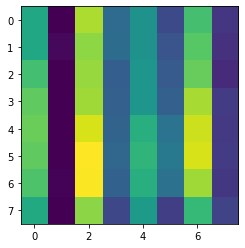

index: 320038
Error: 0.08616418498822578
type                                                         Inst
fill                                                         7357
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 03:27:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7357/...
n_bunches                                                      37
bunch_index                                                  2208
bunch_number                                                   33
ts_length                                                   65536
chunk                                                          11
Name: 2908, dtype: object


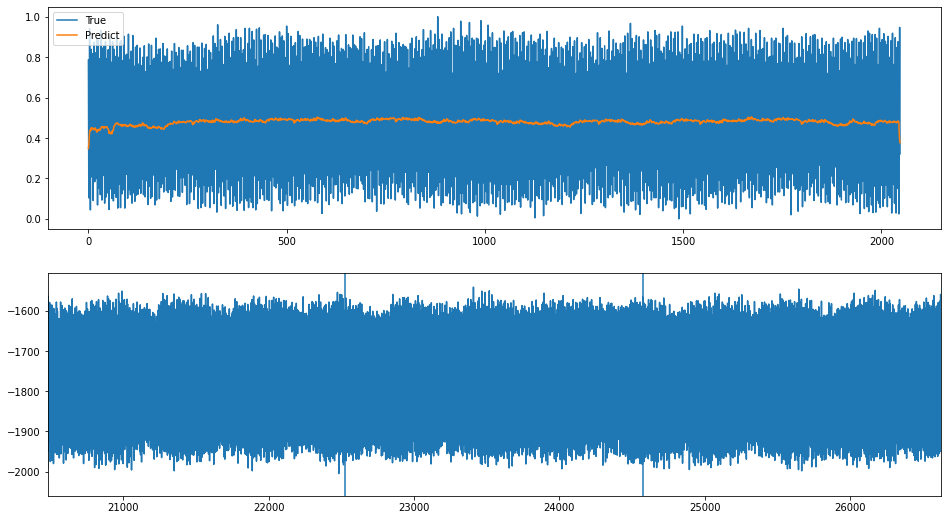

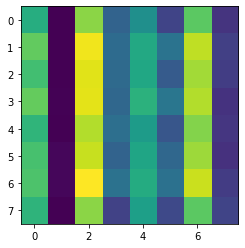

index: 326748
Error: 0.08591092651676246
type                                                         Inst
fill                                                         7357
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 03:27:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7357/...
n_bunches                                                      37
bunch_index                                                  2208
bunch_number                                                   33
ts_length                                                   65536
chunk                                                          13
Name: 3420, dtype: object


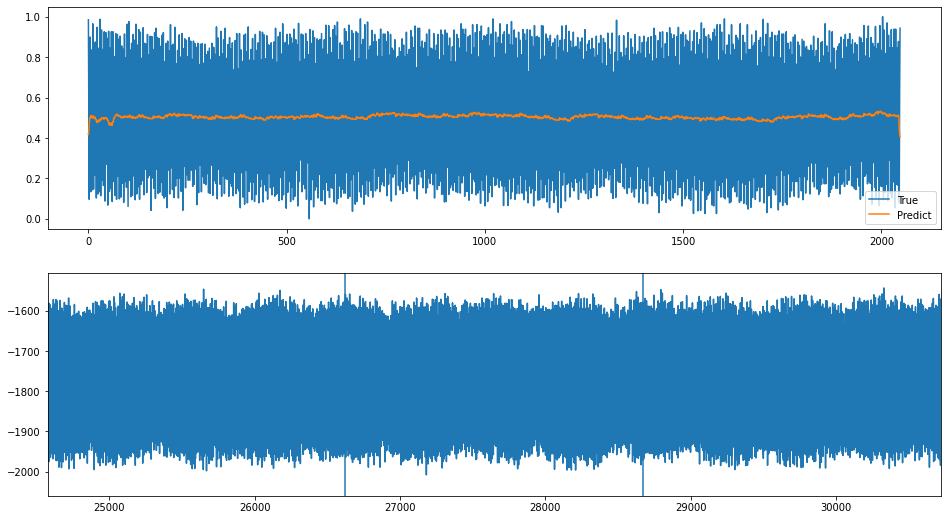

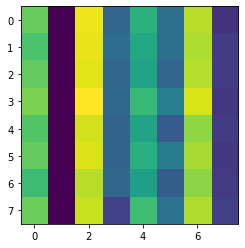

index: 321805
Error: 0.08569735573030192
type                                                         Inst
fill                                                         7357
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 03:27:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7357/...
n_bunches                                                      37
bunch_index                                                  2208
bunch_number                                                   33
ts_length                                                   65536
chunk                                                          17
Name: 4444, dtype: object


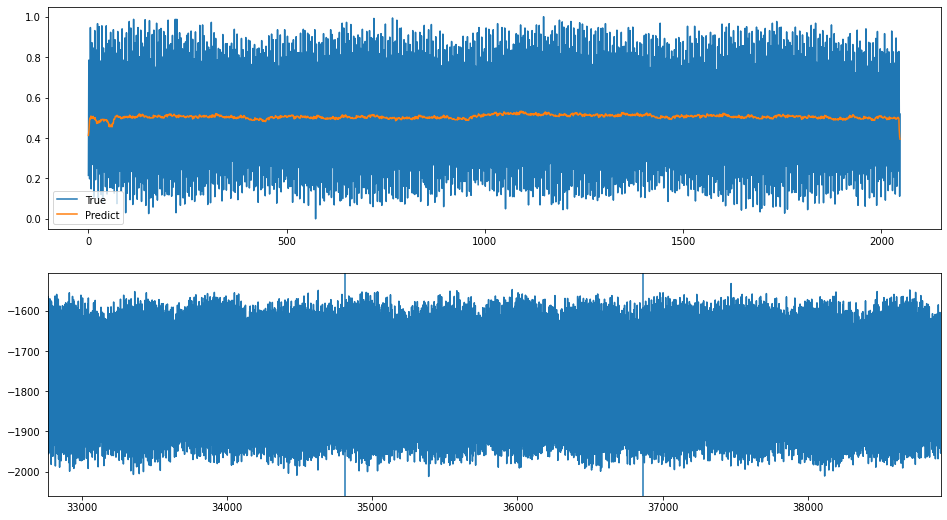

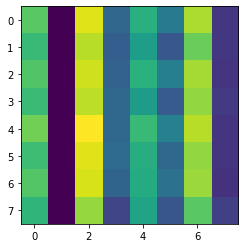

index: 324744
Error: 0.0856644088849598
type                                                         Inst
fill                                                         7357
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 03:27:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7357/...
n_bunches                                                      37
bunch_index                                                  2208
bunch_number                                                   33
ts_length                                                   65536
chunk                                                          10
Name: 2652, dtype: object


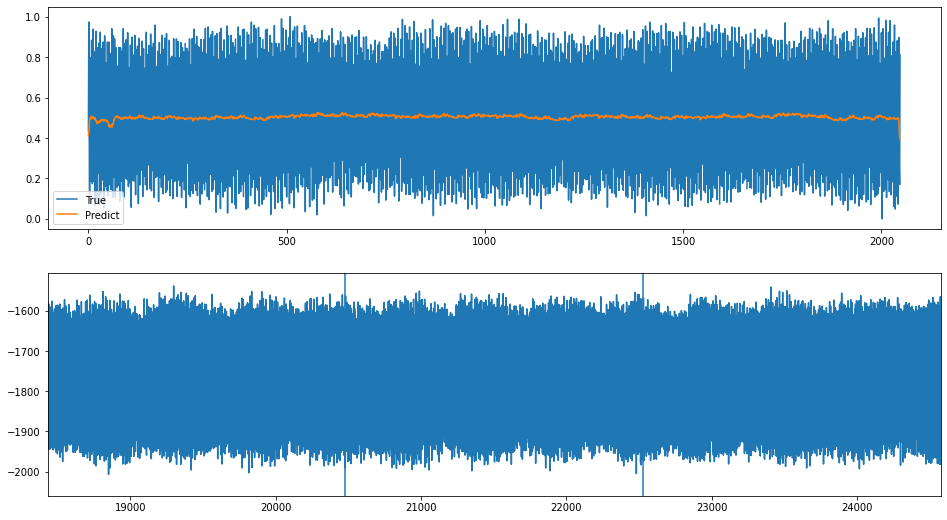

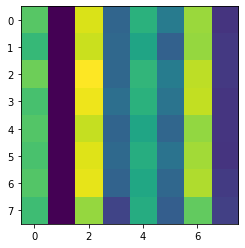

index: 323687
Error: 0.08543569848802529
type                                                         Inst
fill                                                         7357
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 03:27:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7357/...
n_bunches                                                      37
bunch_index                                                  2208
bunch_number                                                   33
ts_length                                                   65536
chunk                                                          29
Name: 7516, dtype: object


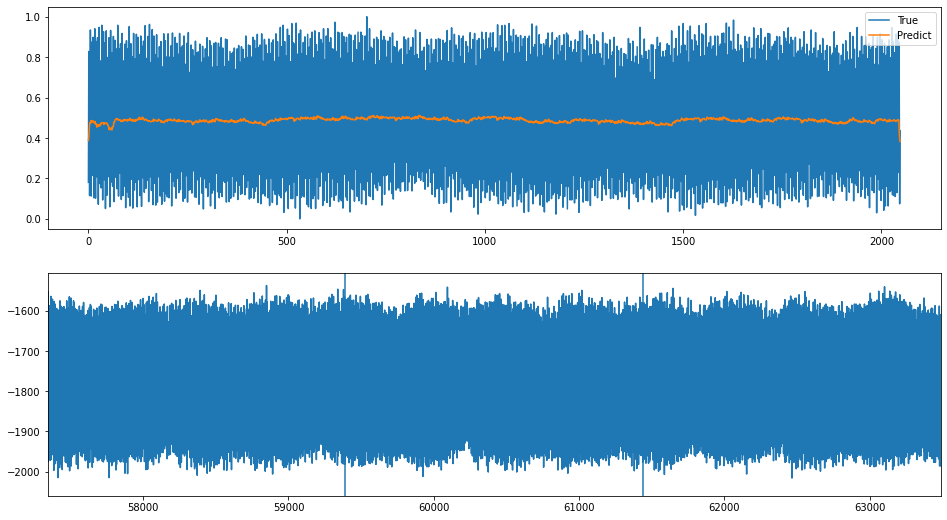

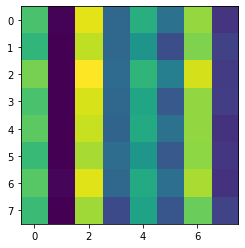

index: 320962
Error: 0.08536053209994168
type                                                         Inst
fill                                                         7357
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 03:27:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7357/...
n_bunches                                                      37
bunch_index                                                  2208
bunch_number                                                   33
ts_length                                                   65536
chunk                                                          25
Name: 6492, dtype: object


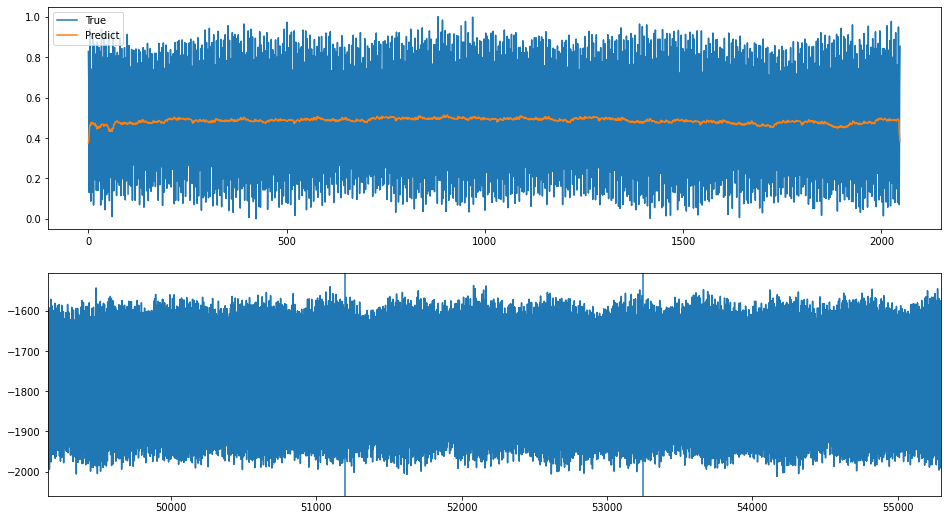

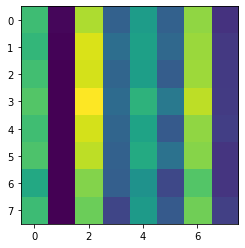

index: 334956
Error: 0.08482342186276948
type                                                         Inst
fill                                                         6729
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-26 15:15:25
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6729/...
n_bunches                                                     252
bunch_index                                                   111
bunch_number                                                   43
ts_length                                                   65536
chunk                                                           6
Name: 1701, dtype: object


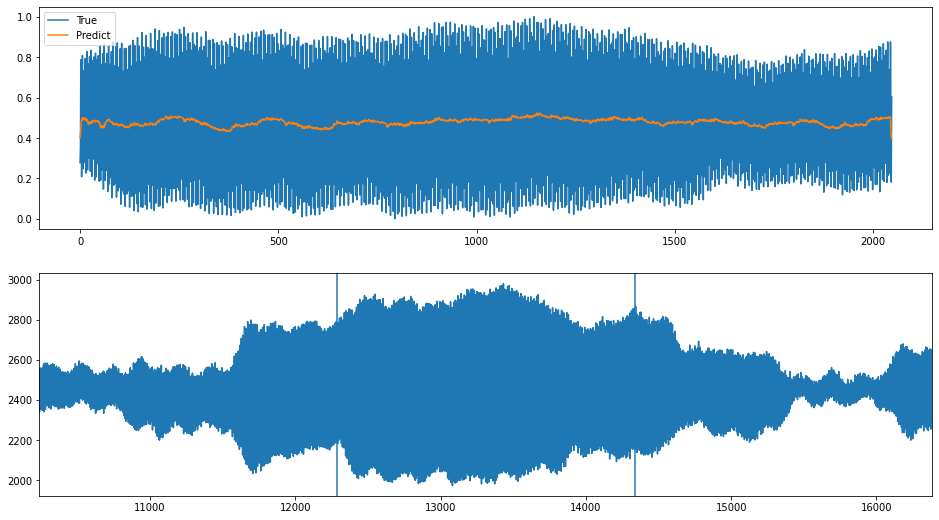

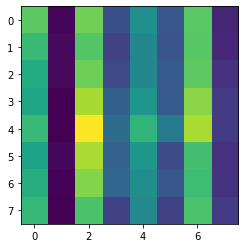

index: 327009
Error: 0.08474642516975181
type                                                         Inst
fill                                                         7357
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 03:27:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7357/...
n_bunches                                                      37
bunch_index                                                  2208
bunch_number                                                   33
ts_length                                                   65536
chunk                                                           7
Name: 1884, dtype: object


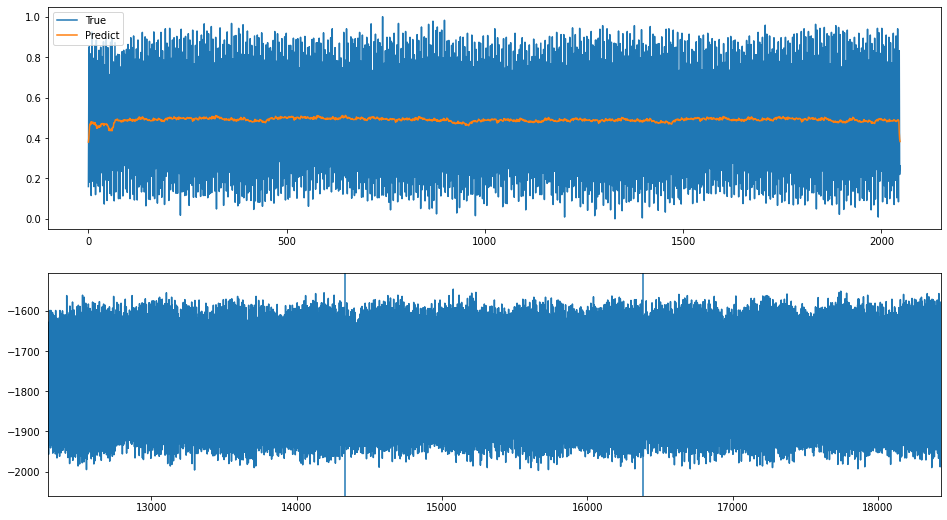

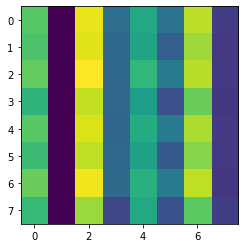

index: 320525
Error: 0.08386083859824128
type                                                         Inst
fill                                                         7357
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 03:27:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7357/...
n_bunches                                                      37
bunch_index                                                  2208
bunch_number                                                   33
ts_length                                                   65536
chunk                                                          30
Name: 7772, dtype: object


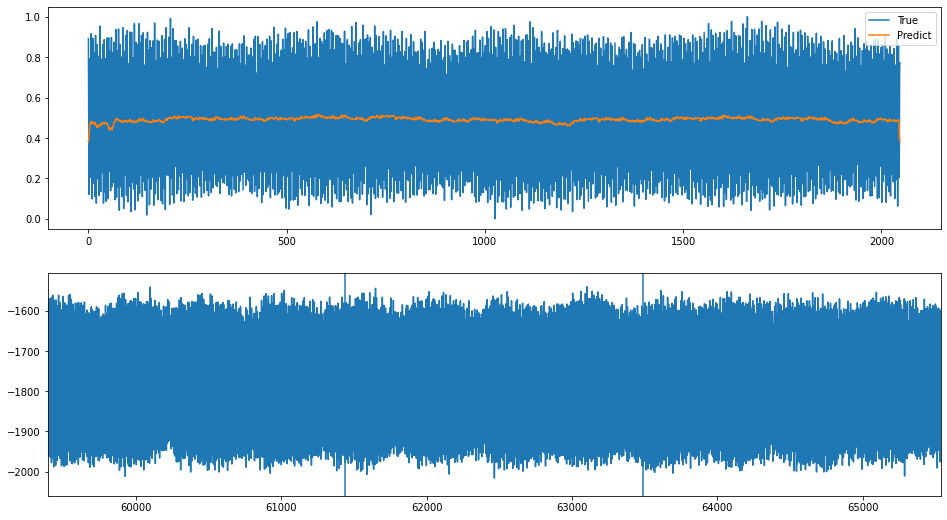

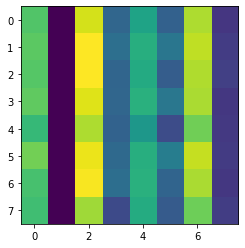

index: 325443
Error: 0.08363447276591329
type                                                         Inst
fill                                                         7357
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 03:27:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7357/...
n_bunches                                                      37
bunch_index                                                  2208
bunch_number                                                   33
ts_length                                                   65536
chunk                                                          15
Name: 3932, dtype: object


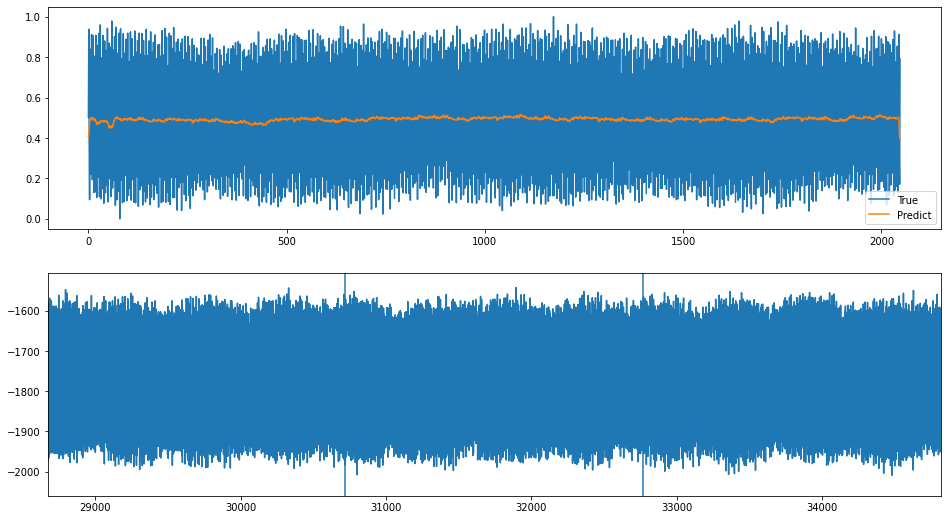

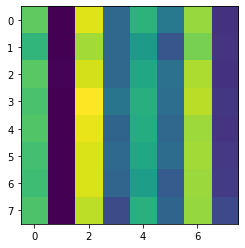

index: 327664
Error: 0.0834108903441743
type                                                         Inst
fill                                                         7357
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 03:27:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7357/...
n_bunches                                                      37
bunch_index                                                  2208
bunch_number                                                   33
ts_length                                                   65536
chunk                                                          28
Name: 7260, dtype: object


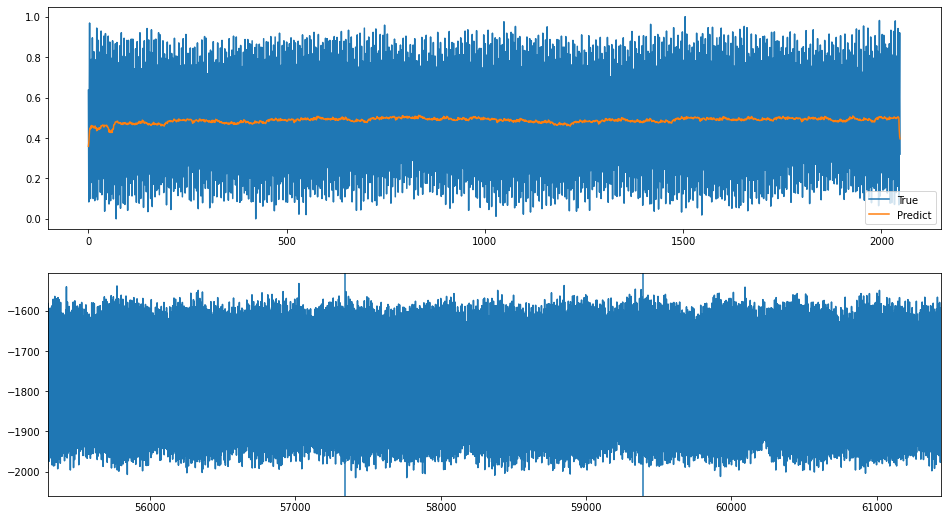

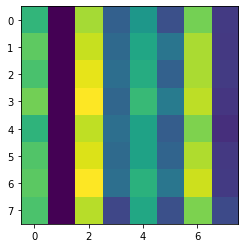

index: 324650
Error: 0.083299737281806
type                                                         Inst
fill                                                         7357
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 03:27:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7357/...
n_bunches                                                      37
bunch_index                                                  2208
bunch_number                                                   33
ts_length                                                   65536
chunk                                                          27
Name: 7004, dtype: object


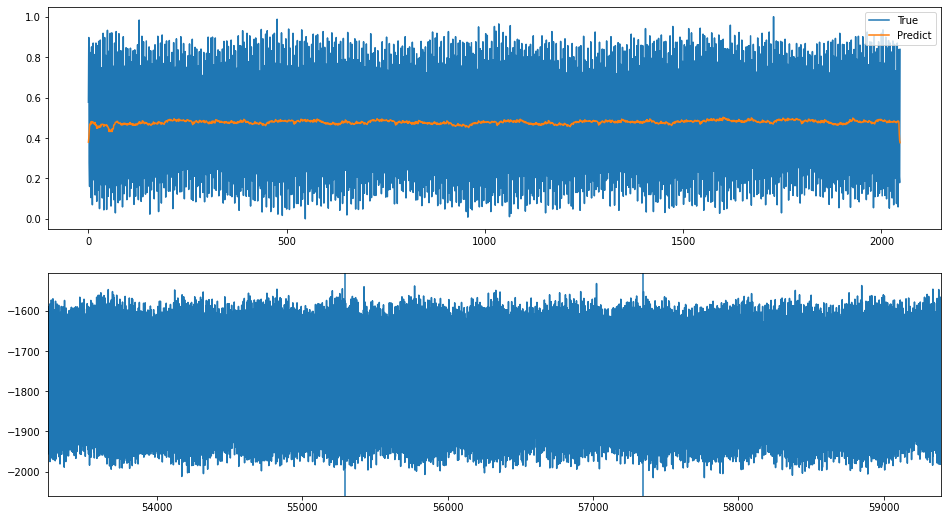

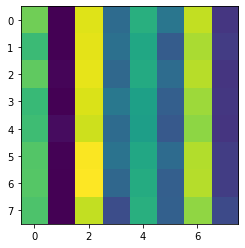

index: 319545
Error: 0.08312576199880028
type                                                         Inst
fill                                                         7357
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 03:27:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7357/...
n_bunches                                                      37
bunch_index                                                  2208
bunch_number                                                   33
ts_length                                                   65536
chunk                                                           3
Name: 860, dtype: object


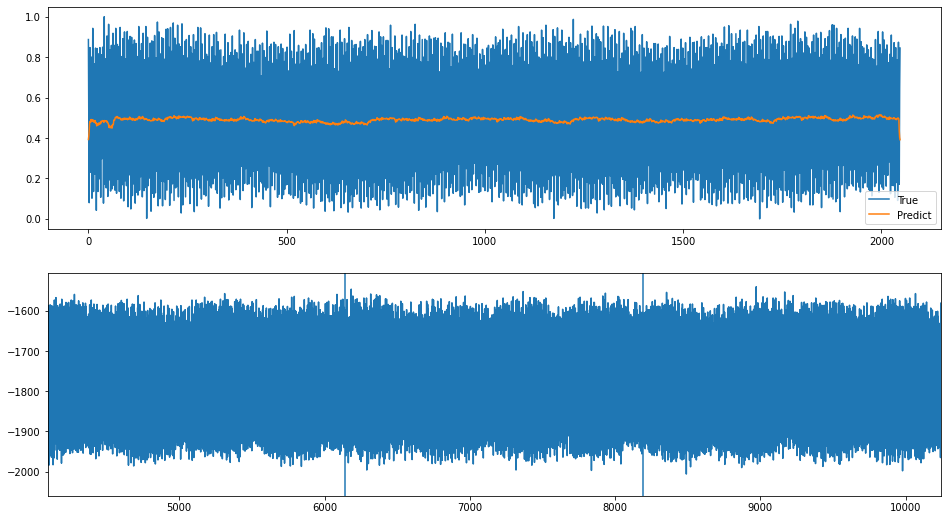

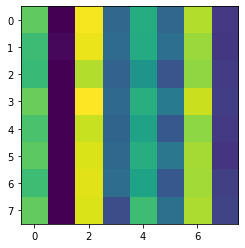

index: 294629
Error: 0.08304344132726993
type                                                         Inst
fill                                                         6597
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-23 10:17:26
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6597/...
n_bunches                                                     228
bunch_index                                                   155
bunch_number                                                  111
ts_length                                                   65536
chunk                                                          14
Name: 3674, dtype: object


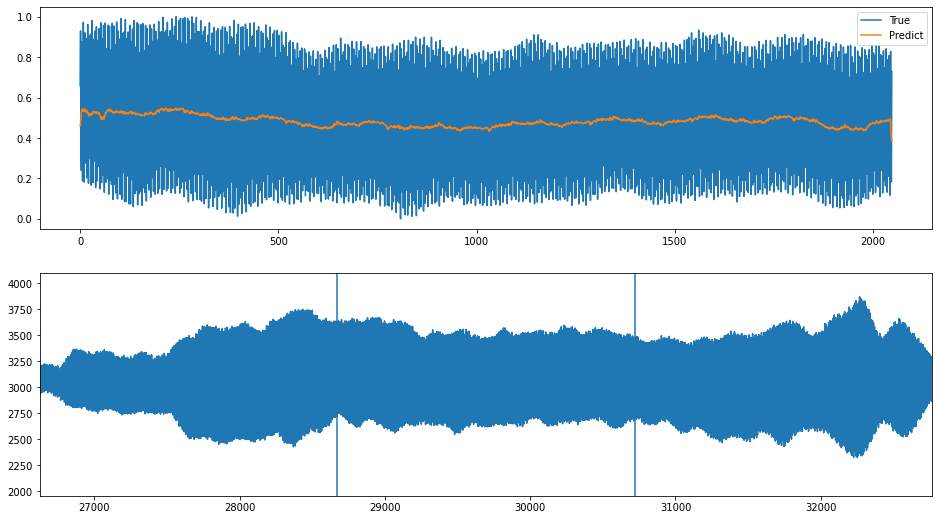

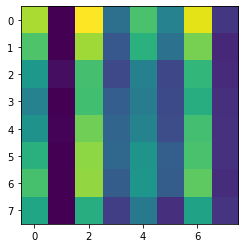

index: 321900
Error: 0.08249279632447125
type                                                         Inst
fill                                                         7357
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 03:27:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7357/...
n_bunches                                                      37
bunch_index                                                  2208
bunch_number                                                   33
ts_length                                                   65536
chunk                                                          21
Name: 5468, dtype: object


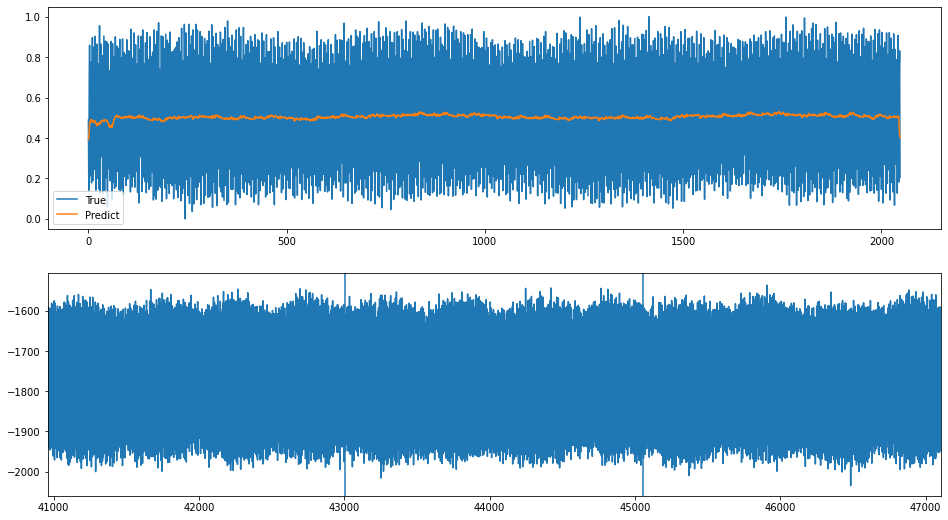

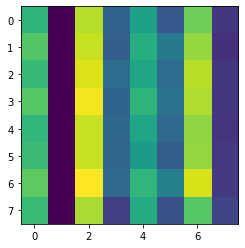

index: 321135
Error: 0.08228134427102488
type                                                         Inst
fill                                                         7357
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 03:27:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7357/...
n_bunches                                                      37
bunch_index                                                  2208
bunch_number                                                   33
ts_length                                                   65536
chunk                                                          19
Name: 4956, dtype: object


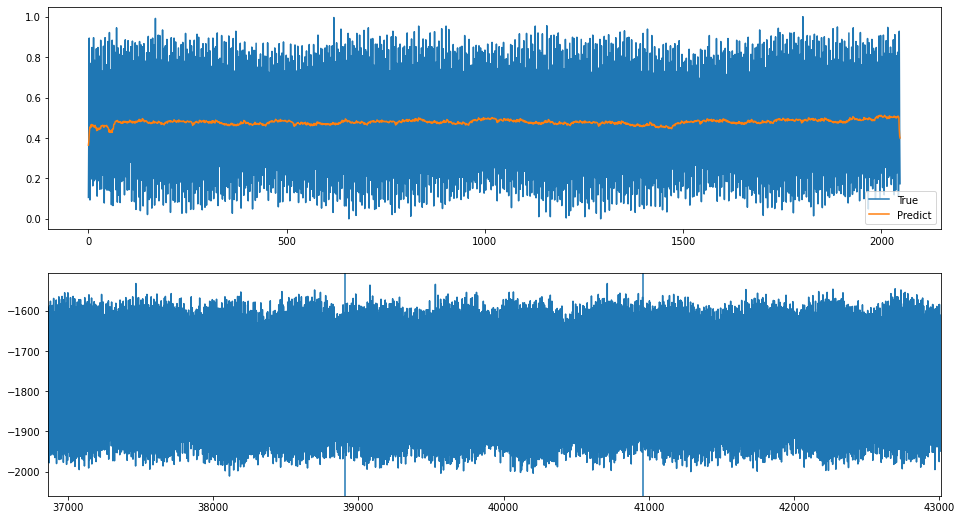

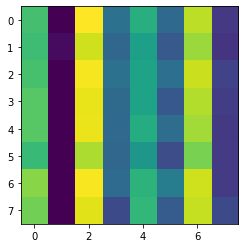

index: 322537
Error: 0.08184747072586943
type                                                         Inst
fill                                                         7357
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 03:27:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7357/...
n_bunches                                                      37
bunch_index                                                  2208
bunch_number                                                   33
ts_length                                                   65536
chunk                                                           5
Name: 1372, dtype: object


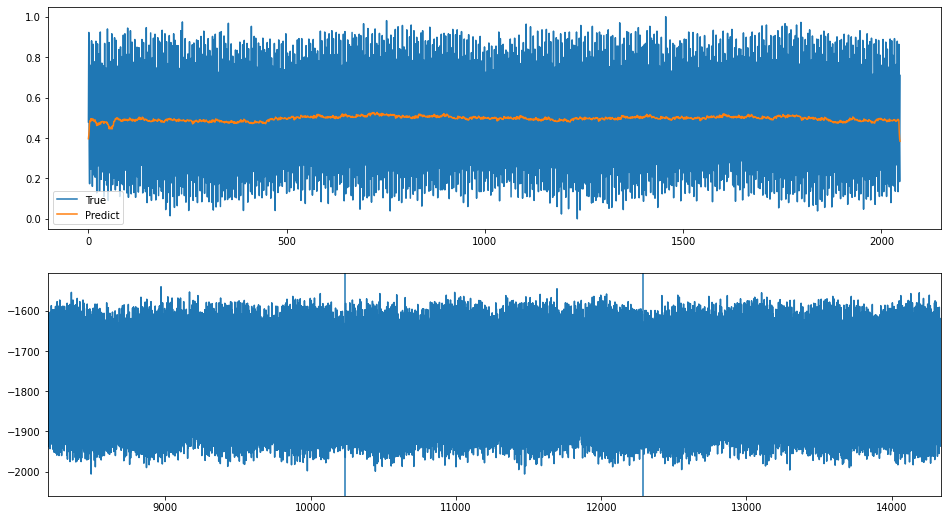

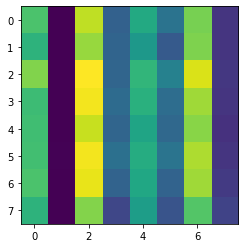

index: 323176
Error: 0.08152710652211159
type                                                         Inst
fill                                                         7357
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-26 03:27:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7357/...
n_bunches                                                      37
bunch_index                                                  2208
bunch_number                                                   33
ts_length                                                   65536
chunk                                                          18
Name: 4700, dtype: object


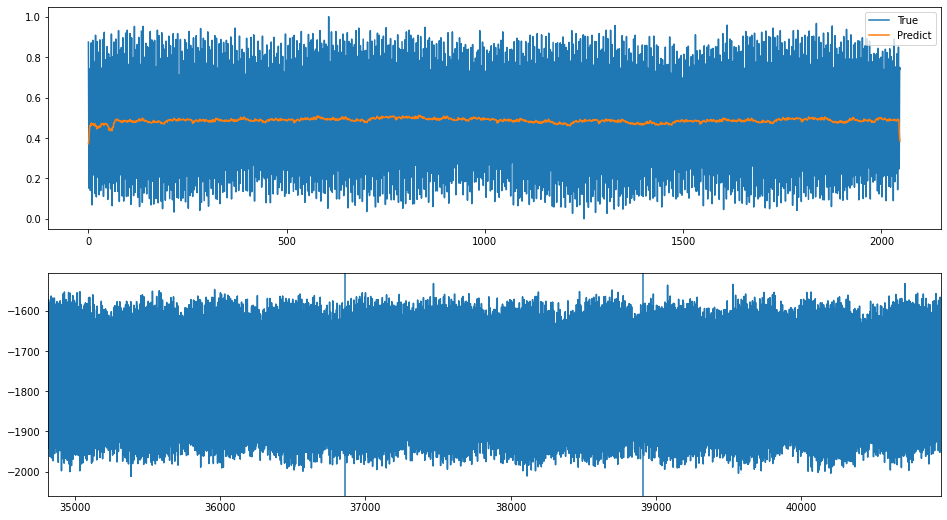

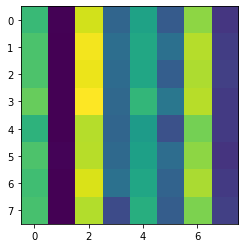

index: 234865
Error: 0.08135423717644089
type                                                         Inst
fill                                                         6452
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-03 03:02:20
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6452/...
n_bunches                                                     129
bunch_index                                                  2531
bunch_number                                                  120
ts_length                                                   65536
chunk                                                           7
Name: 2038, dtype: object


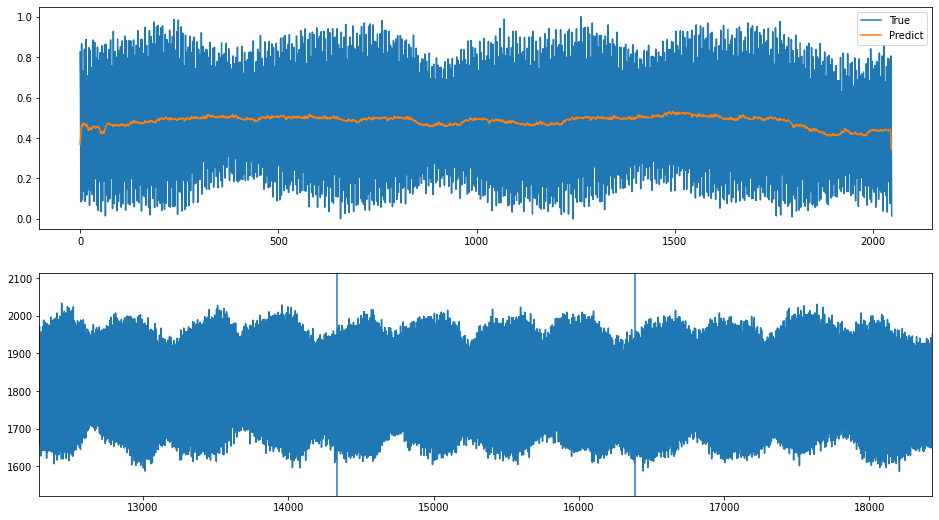

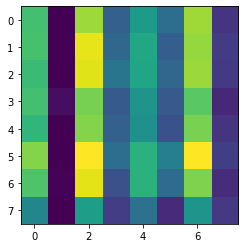

index: 226963
Error: 0.08096247071858607
type                                                         Inst
fill                                                         6275
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 20:43:51
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6275/...
n_bunches                                                    1868
bunch_index                                                     2
bunch_number                                                    2
ts_length                                                   65536
chunk                                                          16
Name: 4135, dtype: object


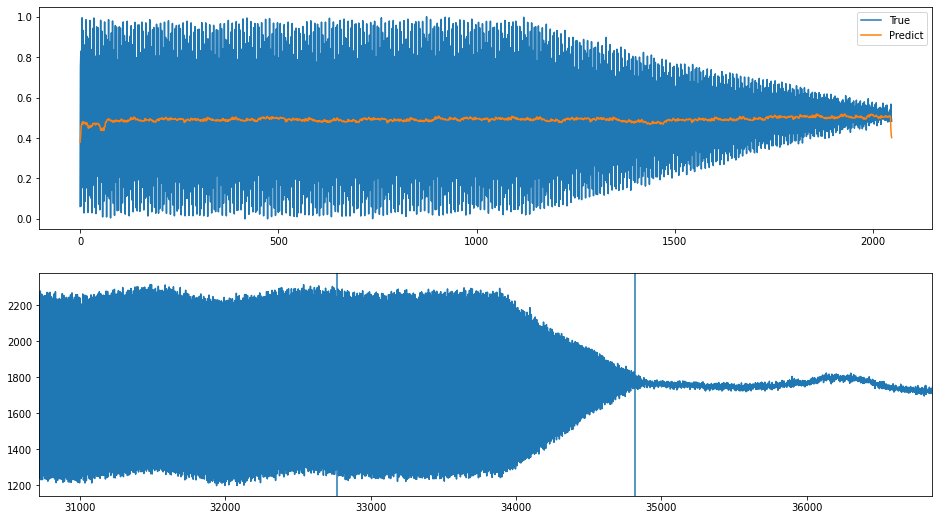

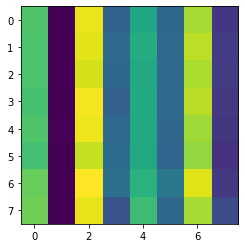

In [26]:
for i in range(1, 51):
    index = sorted_error_indices[-i]
    plot_train_index(index)

# Around the peak

In [27]:
error_around_peak = abs(train_error - hist_peak)
sorted_error_indices_around_peak = np.argsort(error_around_peak)

index: 85018
Error: 0.004594205705943763
type                                                         Inst
fill                                                         6786
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-13 15:32:19
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6786/...
n_bunches                                                    1068
bunch_index                                                   590
bunch_number                                                  413
ts_length                                                   65536
chunk                                                          31
Name: 8092, dtype: object


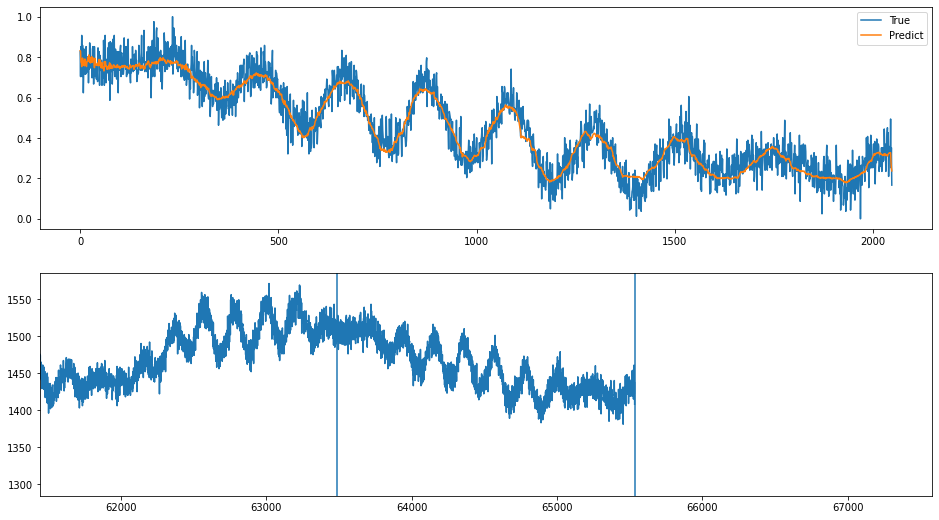

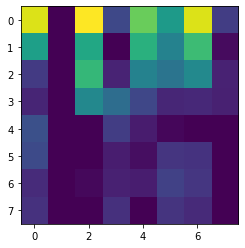

index: 31810
Error: 0.004594203419769986
type                                                         Inst
fill                                                         7229
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-28 08:20:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7229/...
n_bunches                                                     300
bunch_index                                                     4
bunch_number                                                    4
ts_length                                                   65536
chunk                                                           8
Name: 2225, dtype: object


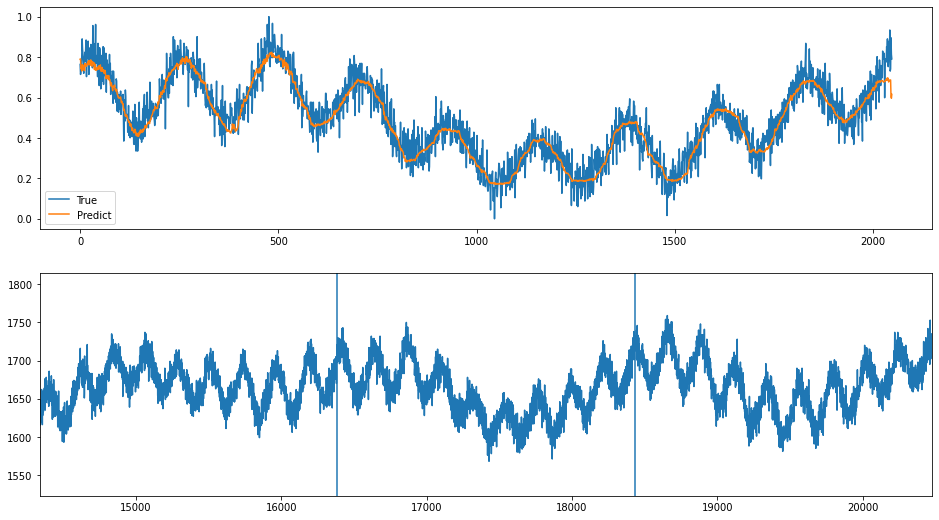

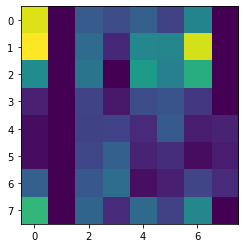

index: 96904
Error: 0.004594199324284591
type                                                         Inst
fill                                                         7040
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-09 19:14:16
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7040/...
n_bunches                                                     780
bunch_index                                                   799
bunch_number                                                  573
ts_length                                                   65536
chunk                                                          13
Name: 3498, dtype: object


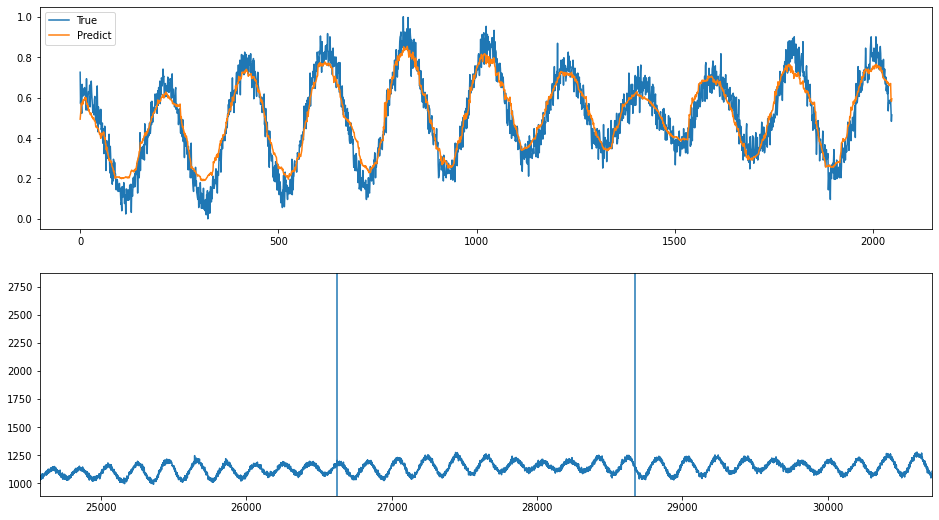

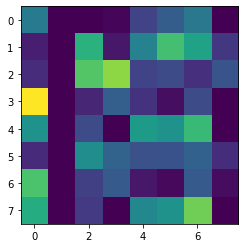

index: 67542
Error: 0.0045942535095479
type                                                         Inst
fill                                                         7108
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-31 04:56:11
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7108/...
n_bunches                                                    1212
bunch_index                                                   610
bunch_number                                                  433
ts_length                                                   65536
chunk                                                           7
Name: 1792, dtype: object


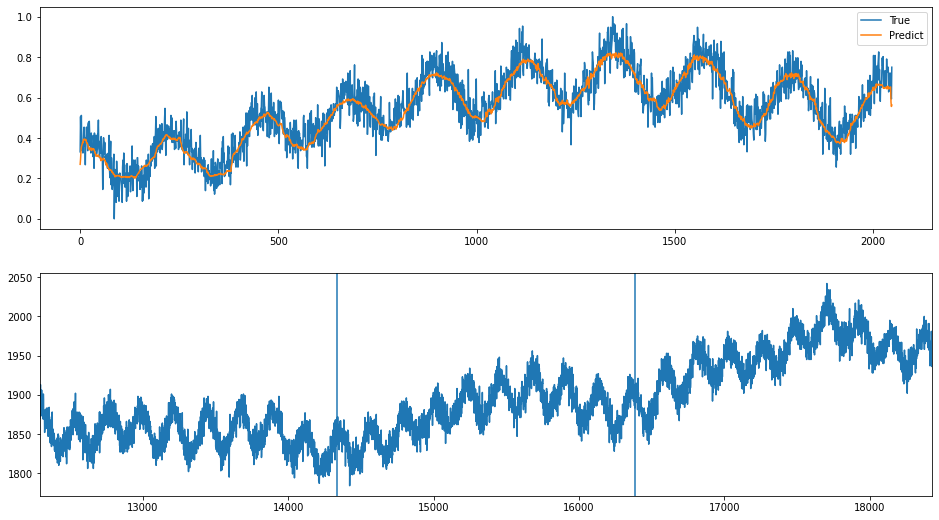

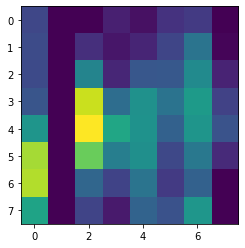

index: 348498
Error: 0.004594178900278313
type                                                         Inst
fill                                                         7264
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-07 00:50:35
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7264/...
n_bunches                                                     636
bunch_index                                                   284
bunch_number                                                  190
ts_length                                                   65536
chunk                                                           5
Name: 1311, dtype: object


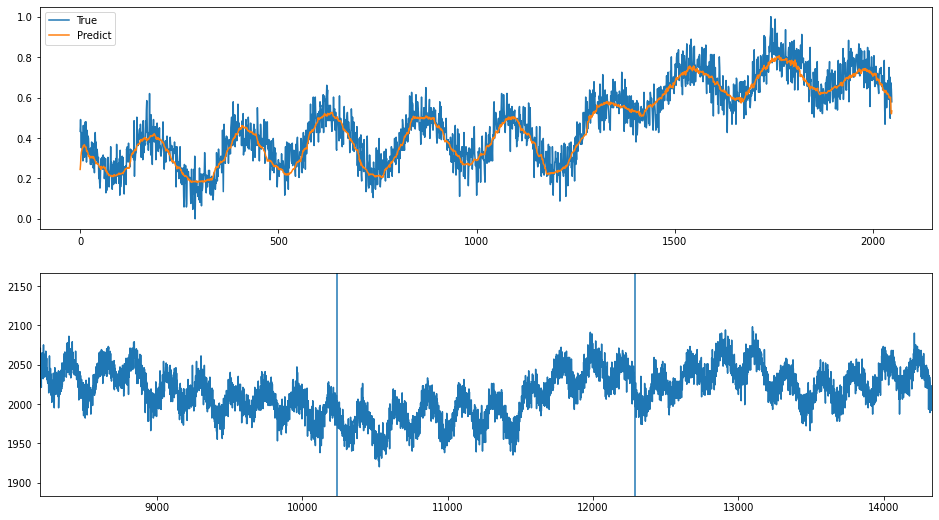

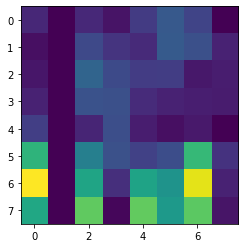

index: 300455
Error: 0.004594174008340951
type                                                         Inst
fill                                                         7235
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-09-29 17:13:31
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7235/...
n_bunches                                                     636
bunch_index                                                   809
bunch_number                                                  583
ts_length                                                   65536
chunk                                                           9
Name: 2495, dtype: object


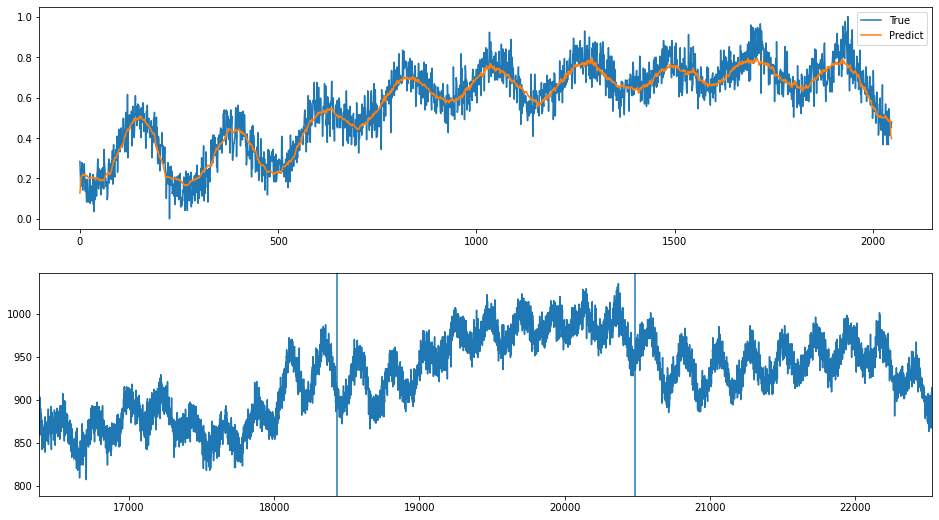

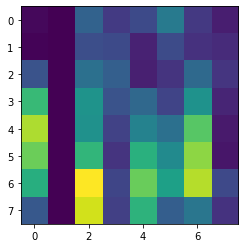

index: 144003
Error: 0.0045941574904099294
type                                                         Inst
fill                                                         6936
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-17 15:09:54
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6936/...
n_bunches                                                     780
bunch_index                                                    71
bunch_number                                                   22
ts_length                                                   65536
chunk                                                           8
Name: 2194, dtype: object


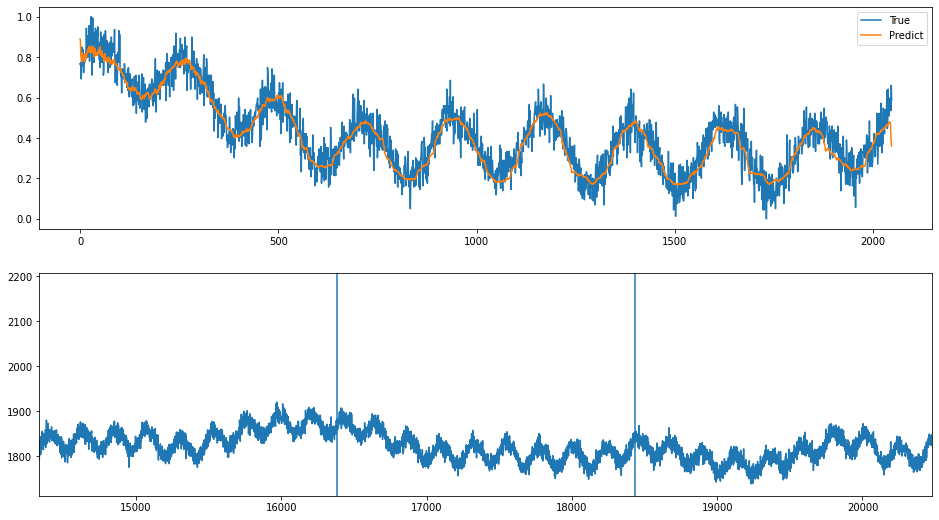

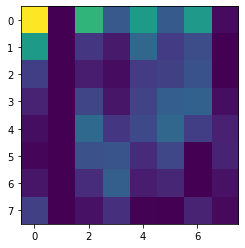

index: 127070
Error: 0.0045943023221329685
type                                                         Inst
fill                                                         6183
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-09 20:12:54
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6183/...
n_bunches                                                     908
bunch_index                                                  1525
bunch_number                                                  838
ts_length                                                   65536
chunk                                                           9
Name: 2519, dtype: object


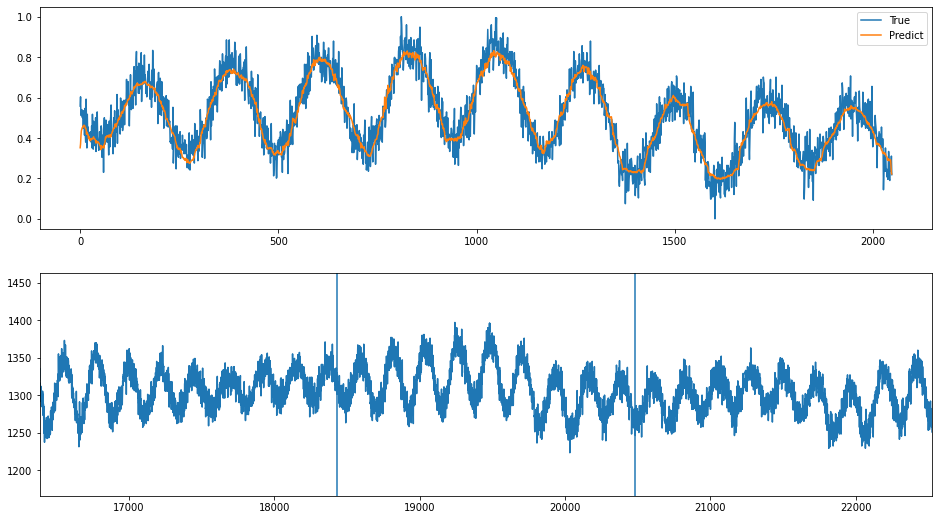

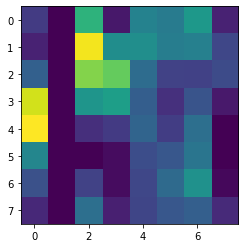

index: 78694
Error: 0.0045943138661112
type                                                         Inst
fill                                                         6616
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-27 03:50:00
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6616/...
n_bunches                                                     505
bunch_index                                                  1183
bunch_number                                                  343
ts_length                                                   65536
chunk                                                          10
Name: 2638, dtype: object


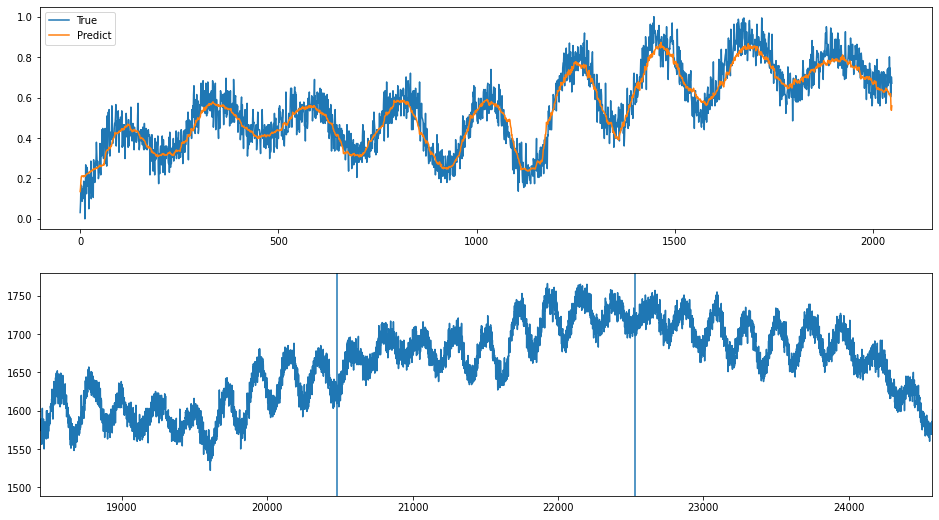

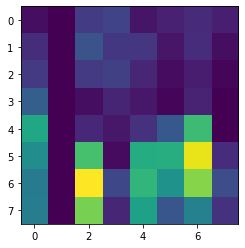

index: 206421
Error: 0.004594120974822702
type                                                         Inst
fill                                                         7271
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-09 17:16:29
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7271/...
n_bunches                                                     636
bunch_index                                                   340
bunch_number                                                  239
ts_length                                                   65536
chunk                                                          14
Name: 3611, dtype: object


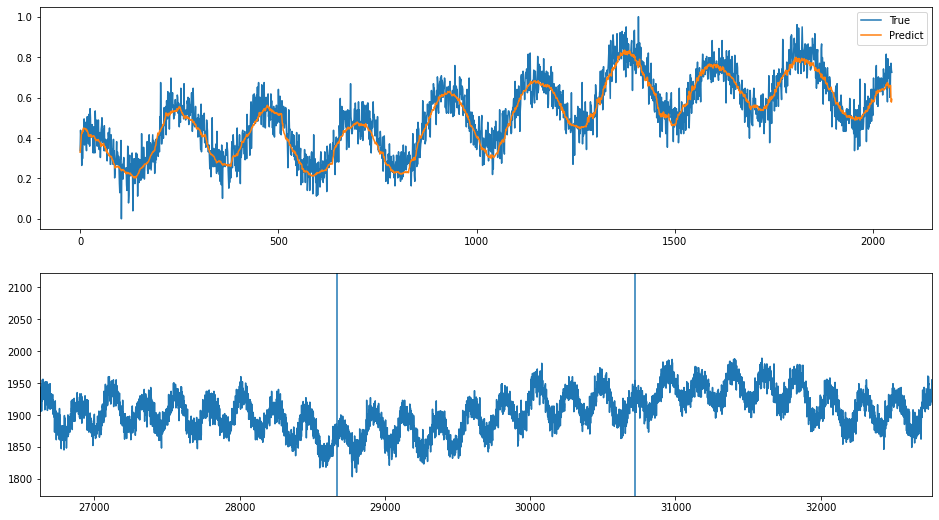

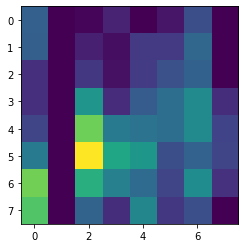

In [28]:
for i in range(10):
    index = sorted_error_indices_around_peak[i]
    plot_train_index(index)

# Around a point

In [29]:
# point = 

In [30]:
# error_around_peak = abs(train_error - point)
# sorted_error_indices_around_point = np.argsort(error_around_peak)

In [31]:
# for i in range(10):
#     index = sorted_error_indices_around_point[i]
#     plot_train_index(index)

# Clustering

In [62]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [32]:
indices = sorted_error_indices[-np.arange(1, 1024+1)]
encoding_true = train_data[indices]
encoding_pred = train_prediction[indices]
encoding_meta = train_meta.iloc[indices]
try:
    encoded = checker.encode(encoding_true)
except:
    encoded = np.array(checker.encoder(encoding_true)).squeeze()
encoded_2d = encoded.reshape(encoded.shape[0], -1)

In [33]:
encoded_2d.shape

(1024, 64)

In [63]:
scaler = StandardScaler()
encoded_2d_norm = scaler.fit_transform(encoded_2d.T).T

In [34]:
print(encoded_2d[0])

[0.83998173 0.         1.1156332  0.36137062 0.63951164 0.3226746
 0.93417317 0.2595539  0.80279005 0.01531302 1.0307884  0.40231404
 0.73740476 0.44663218 1.0736971  0.05298388 0.7512861  0.
 1.1293223  0.40550324 0.676219   0.39036527 1.0145166  0.23368609
 0.89357823 0.         1.122834   0.3876835  0.74022806 0.46269795
 1.073245   0.2184687  0.8217538  0.01676404 1.229701   0.45361412
 0.8683603  0.53444314 1.0939891  0.17666537 0.8840892  0.
 1.013098   0.3938794  0.59814805 0.3260865  0.893486   0.25928944
 0.8588488  0.08824909 1.1456287  0.44142842 0.7938222  0.53613067
 1.1224921  0.12222186 0.78916895 0.         1.0307901  0.26585078
 0.6666768  0.2719582  0.8728173  0.2881663 ]


In [35]:
encoded_2d.min()

0.0

In [36]:
encoded_2d.max()

5.589724

In [60]:
def plot_clusters(cluster_indices):
    fig, axes = plt.subplots(encoding_true.shape[2], 1, figsize=(12, 3))
    if not isinstance(axes, np.ndarray):
        axes = np.array([axes])
    for i in range(encoding_true.shape[2]):
        axes[i].plot(encoding_true[cluster_indices][:,:, i].T,
                     linewidth=0,
                     marker='.',
                     alpha=0.5)
    return fig, axes

def plot_clusters_grid(cluster_indices):
    grid_size = int(np.sqrt(len(cluster_indices)))
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(6, 6))
    if not isinstance(axes, np.ndarray):
        axes = np.array([axes])
    axes = axes.flatten()
    for i in range(len(axes)):
        axes[i].plot(encoding_true[cluster_indices[i]], linewidth=0, marker=',')
    return fig, axes

def plot_cluster_imgs_grid(cluster_indices):
    grid_size = int(np.sqrt(len(cluster_indices)))
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(6, 6))
    if not isinstance(axes, np.ndarray):
        axes = np.array([axes])
    axes = axes.flatten()
    for i in range(len(axes)):
        axes[i].imshow(encoded[cluster_indices[i]])
    return fig, axes

def plot_cluster_imgs(cluster_indices):
    fig, axes = plt.subplots(1, len(cluster_indices))
    if not isinstance(axes, np.ndarray):
        axes = np.array([axes])
    for i, img in enumerate(encoded[cluster_indices]):
        axes[i].imshow(img)
    return fig, axes

def plot_avg_encoding(cluster_indices):
    plt.imshow(encoded[cluster_indices].mean(axis=0))

In [38]:
import sklearn
from sklearn.manifold import TSNE

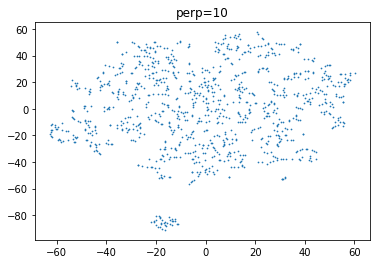

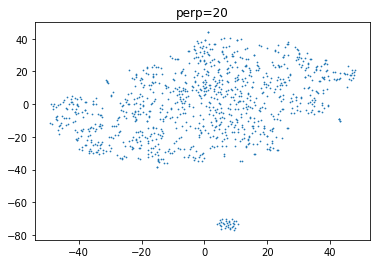

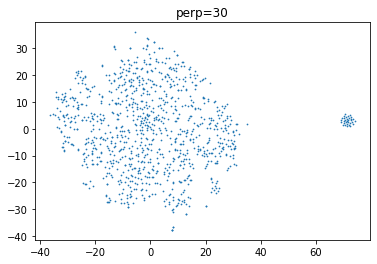

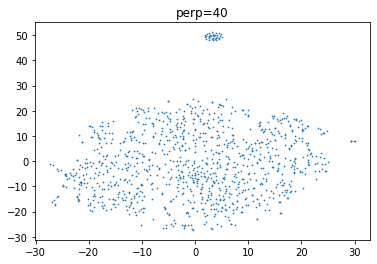

In [39]:
for perplexity in [10, 20, 30, 40]:
    tsne = TSNE(perplexity=perplexity)
    encoded_2d_tsne = tsne.fit_transform(encoded_2d)
    plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2)
    plt.title(f"perp={perplexity}")
    plt.show()

In [40]:
tsne = TSNE(perplexity=30)
encoded_2d_tsne = tsne.fit_transform(encoded_2d)

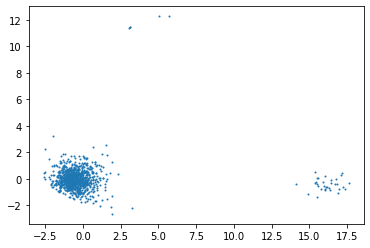

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
encoded_2d_pca = pca.fit_transform(encoded_2d)
plt.scatter(encoded_2d_pca[:, 0], encoded_2d_pca[:, 1], marker='.', s=4)

In [42]:
pca.explained_variance_ratio_.sum()

0.9727386

In [43]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib as mpl
mpl.style.use("default")

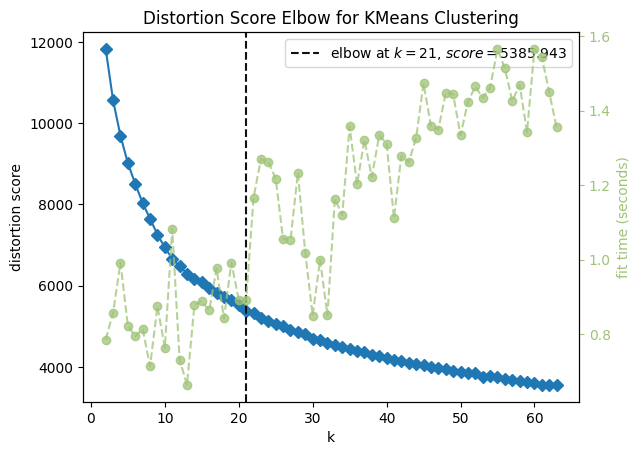

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [67]:
kmeans = KMeans()
viz = KElbowVisualizer(kmeans, k=(2, 64))
viz.fit(encoded_2d_norm)
viz.show()

-------------
n_clusters: 21
cluster 0
N samples: 62


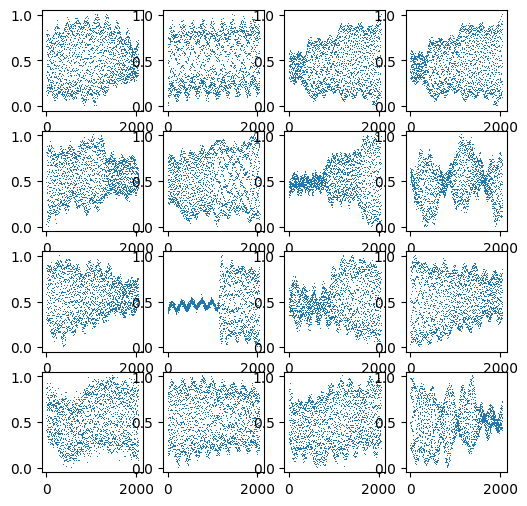

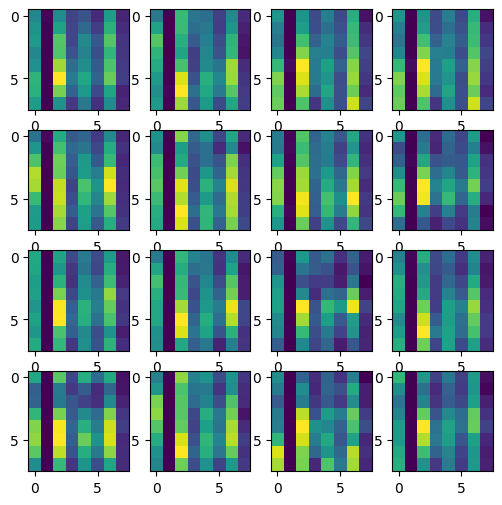

cluster 1
N samples: 55


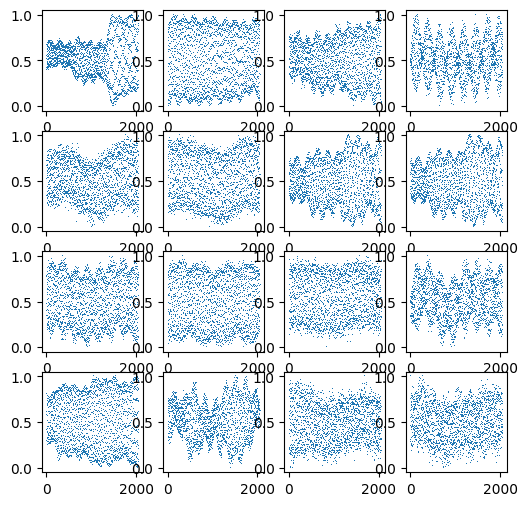

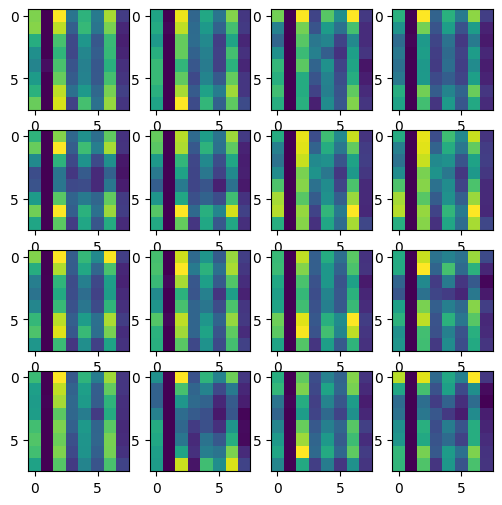

cluster 2
N samples: 42


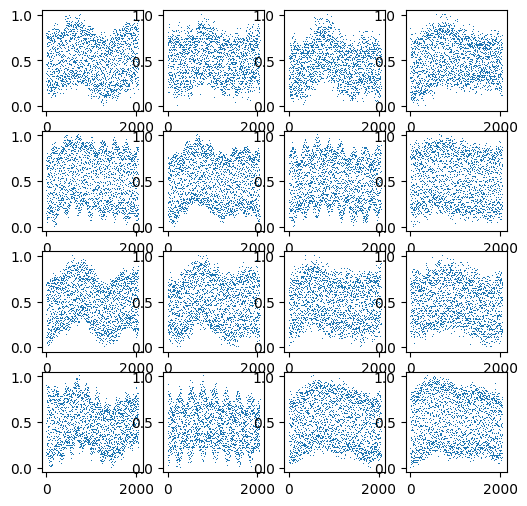

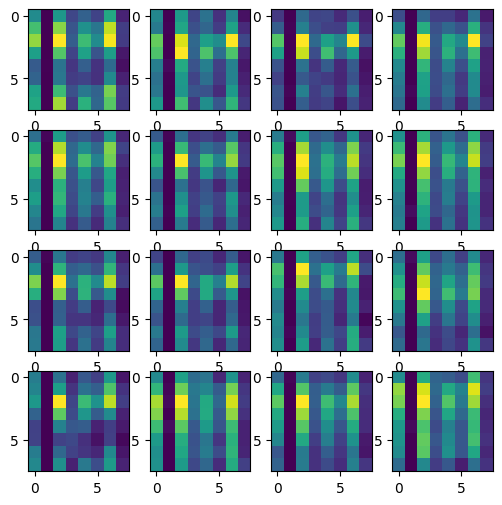

cluster 3
N samples: 225


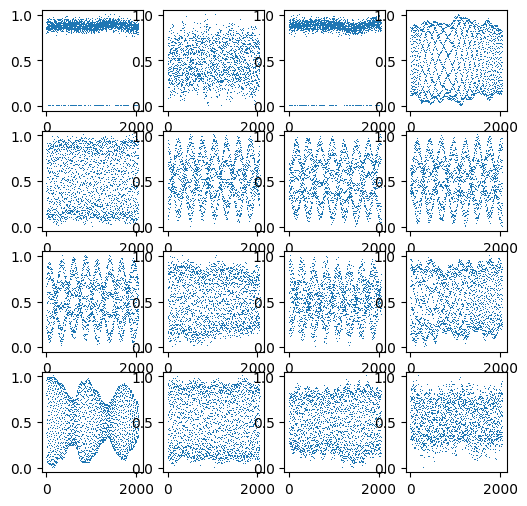

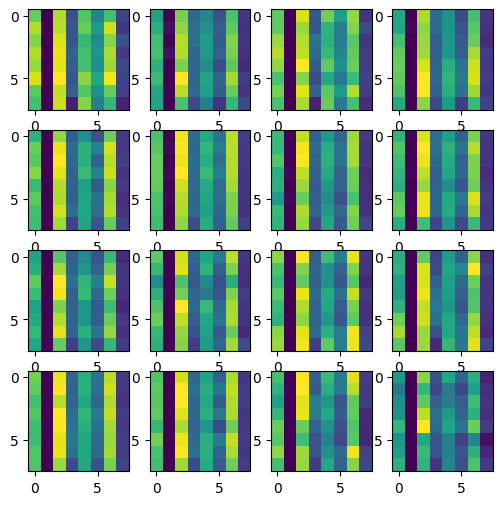

cluster 4
N samples: 52


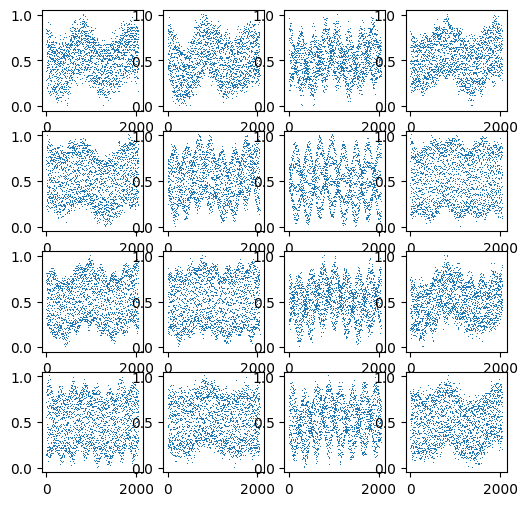

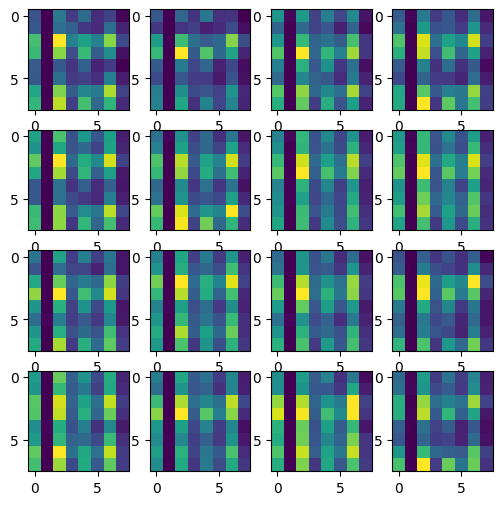

cluster 5
N samples: 66


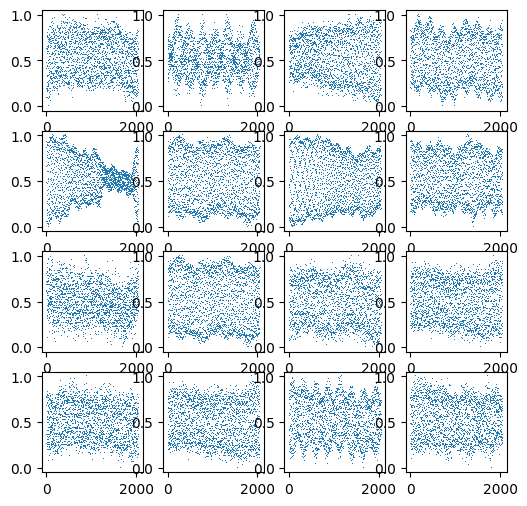

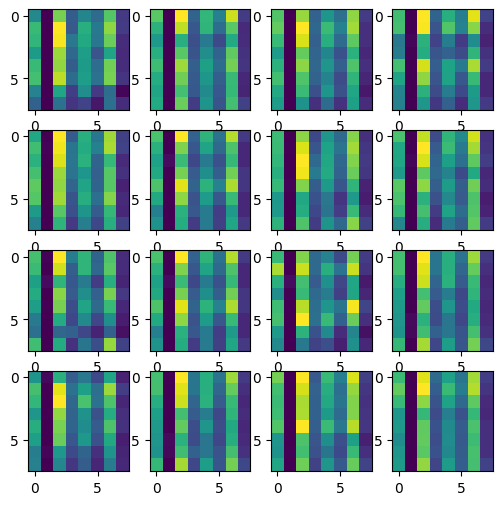

cluster 6
N samples: 5


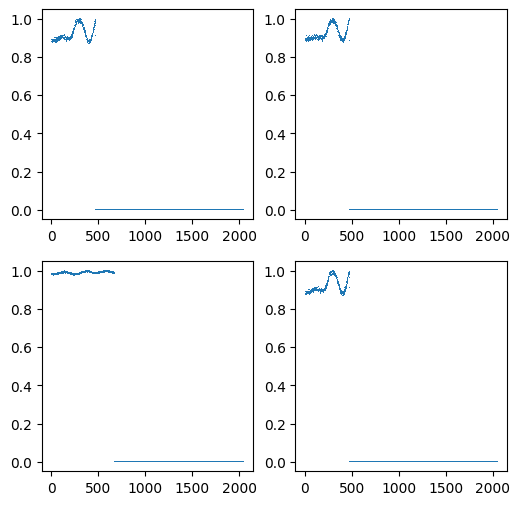

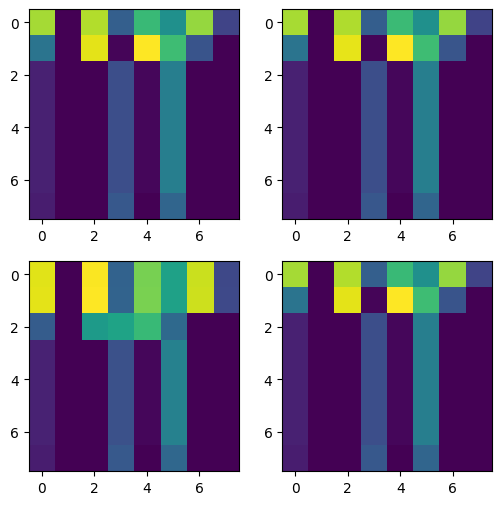

cluster 7
N samples: 50


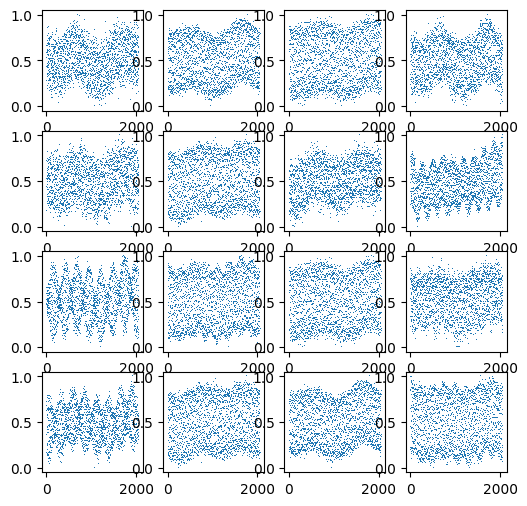

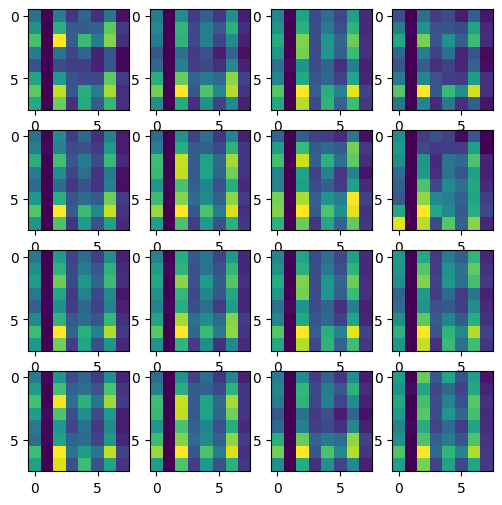

cluster 8
N samples: 39


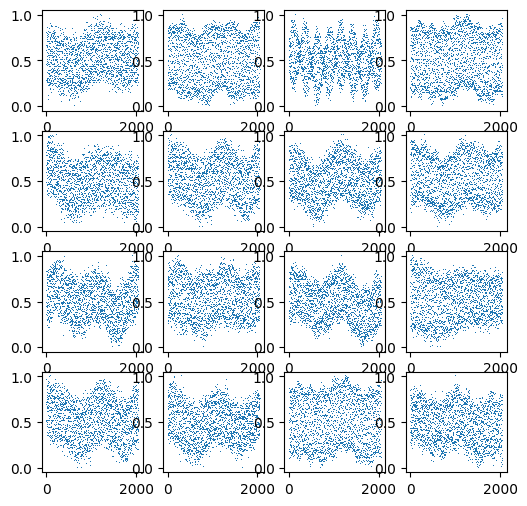

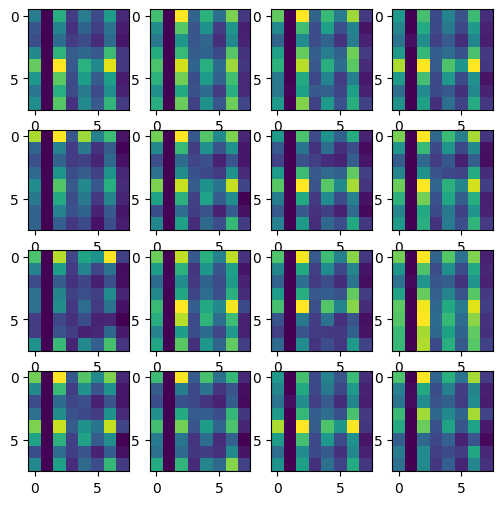

cluster 9
N samples: 36


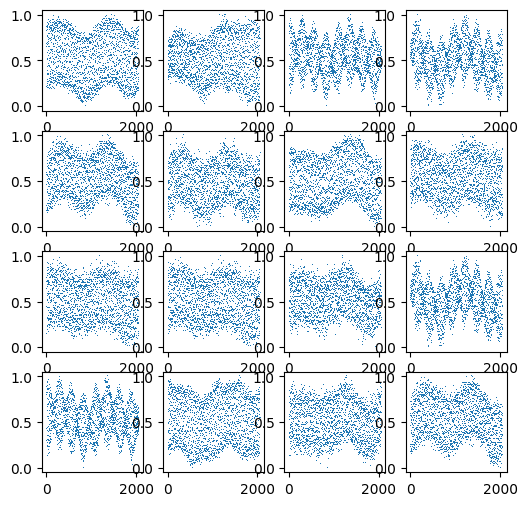

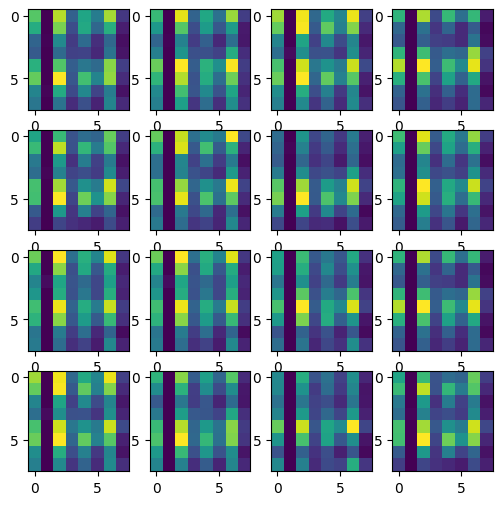

cluster 10
N samples: 39


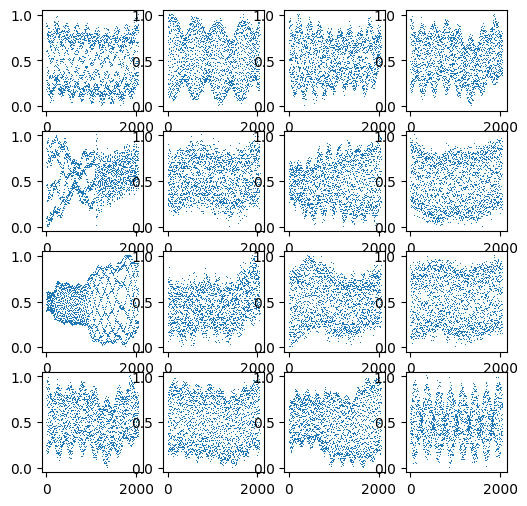

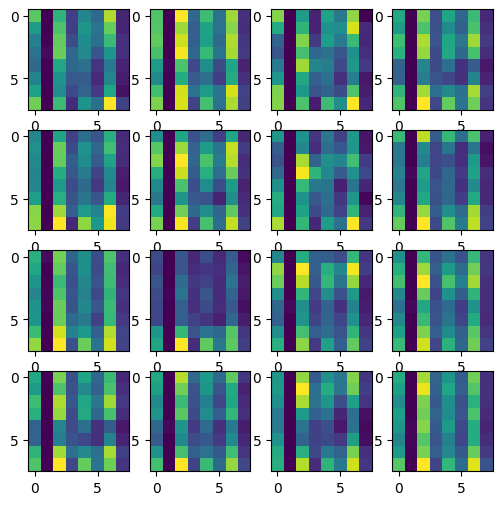

cluster 11
N samples: 32


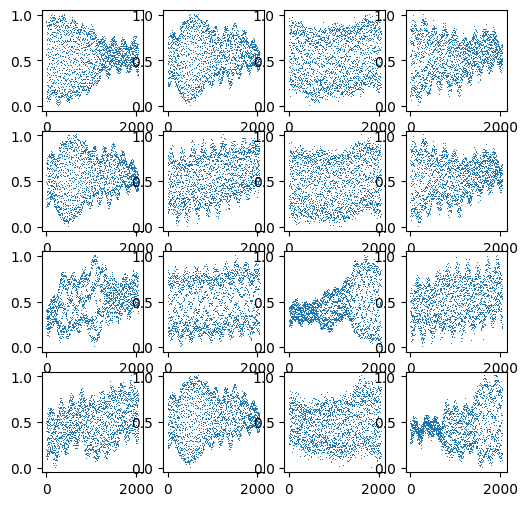

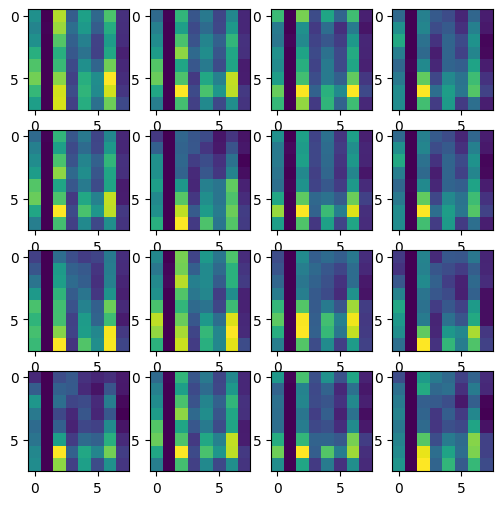

cluster 12
N samples: 39


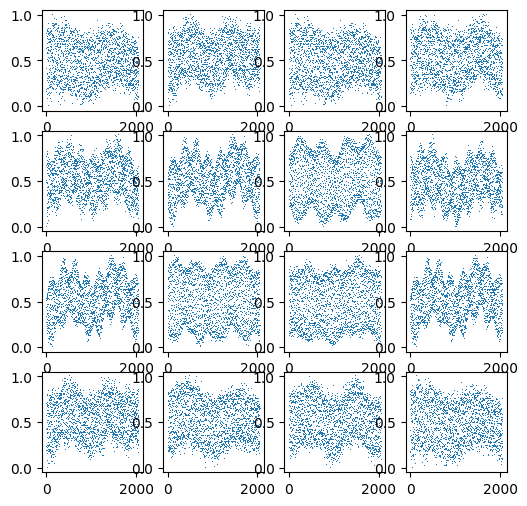

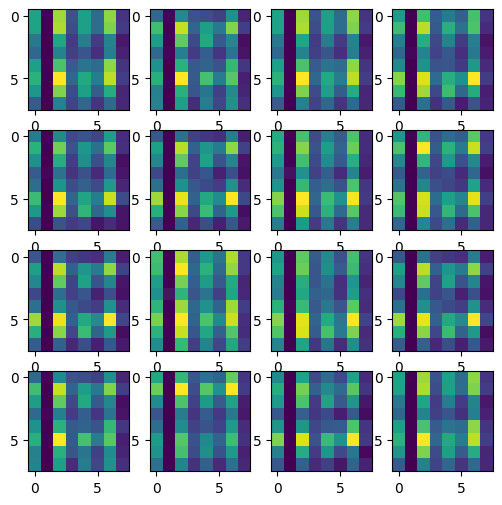

cluster 13
N samples: 32


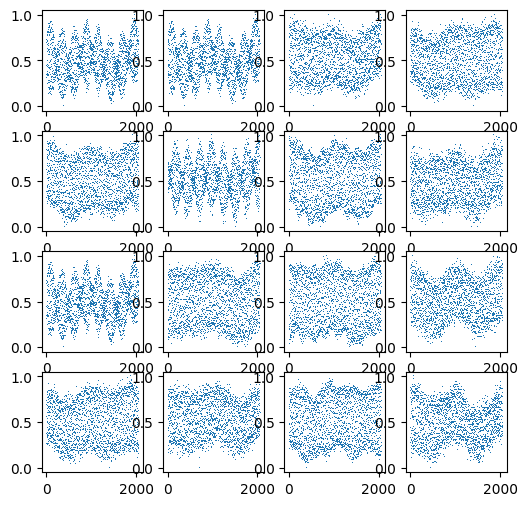

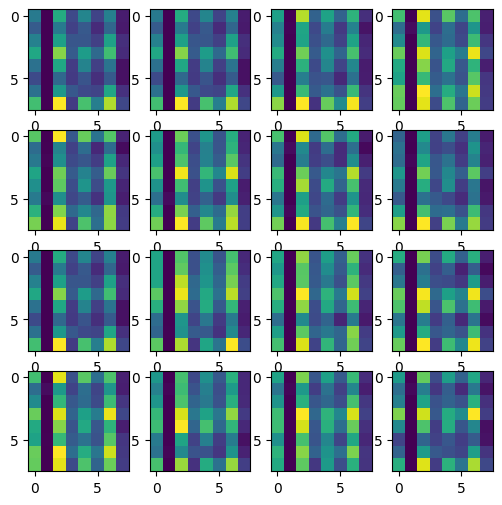

cluster 14
N samples: 32


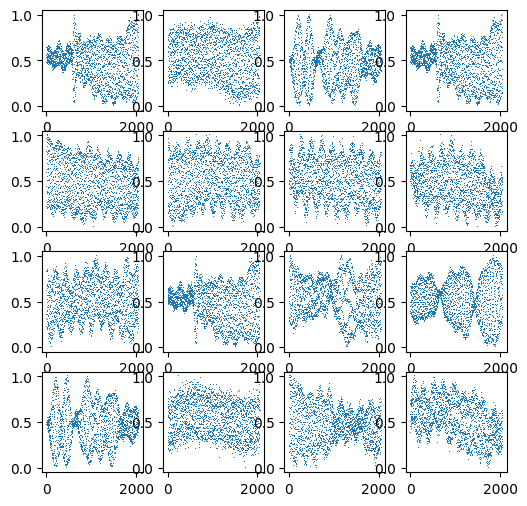

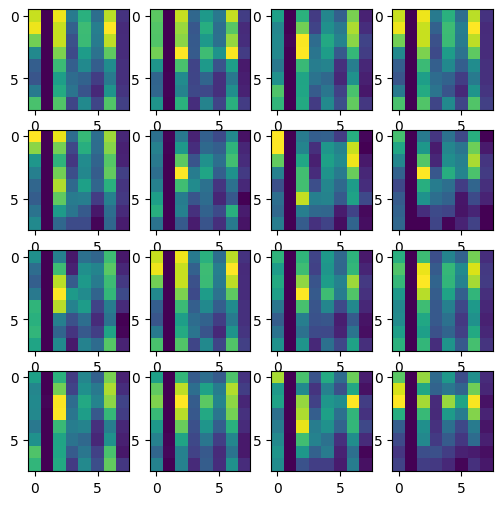

cluster 15
N samples: 2


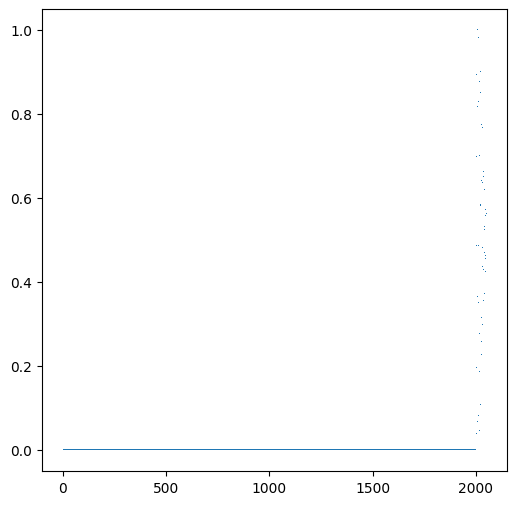

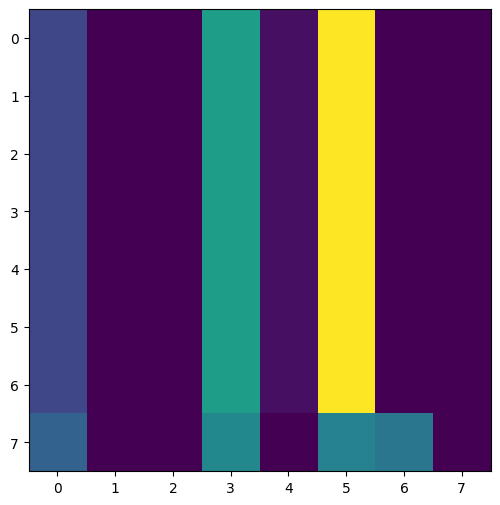

cluster 16
N samples: 26


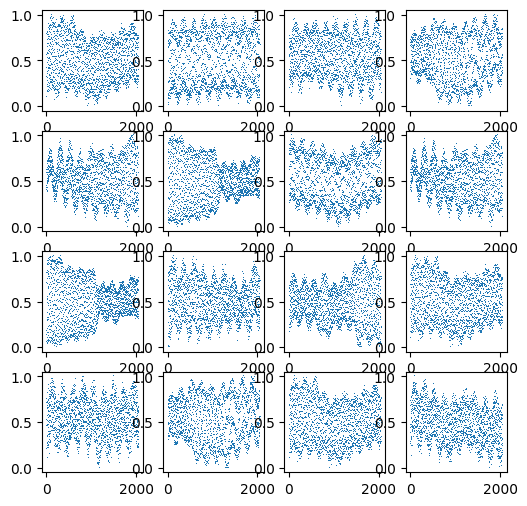

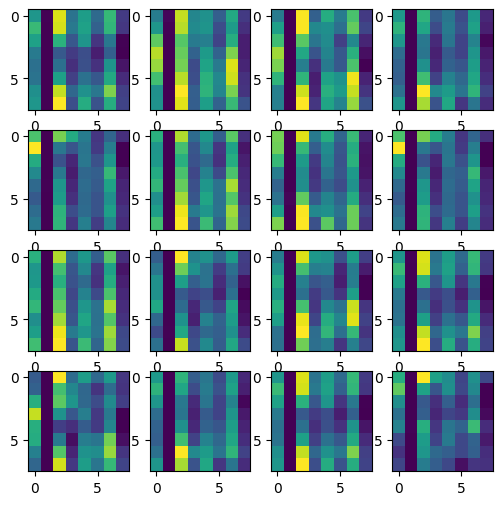

cluster 17
N samples: 72


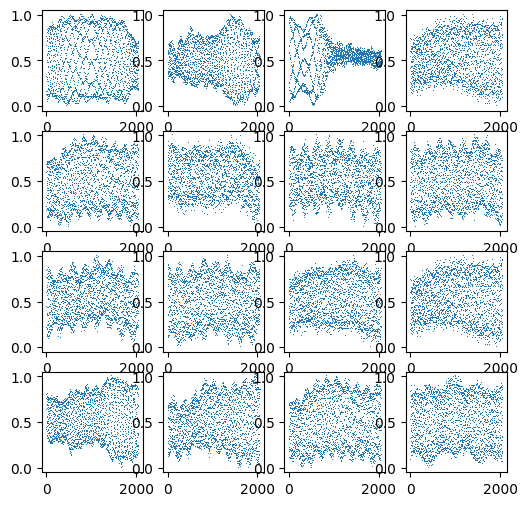

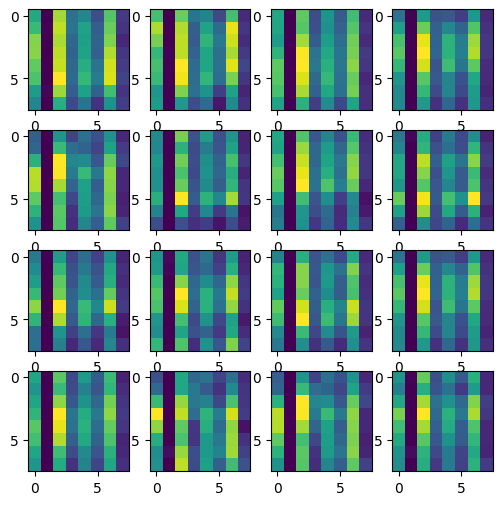

cluster 18
N samples: 33


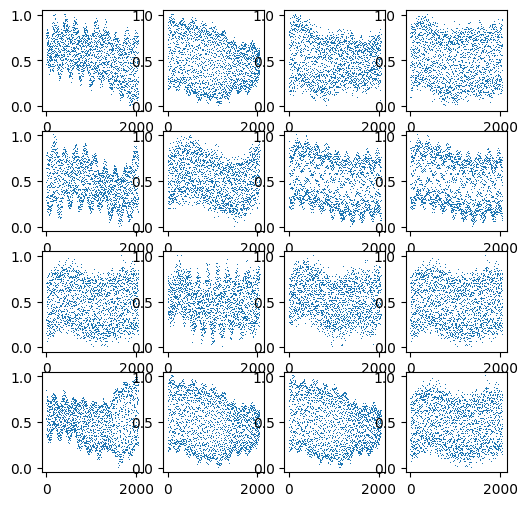

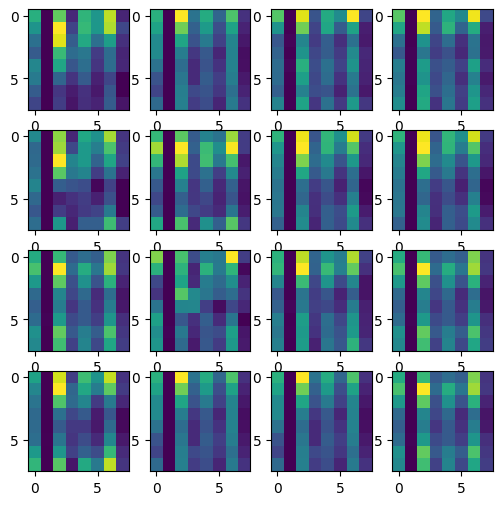

cluster 19
N samples: 33


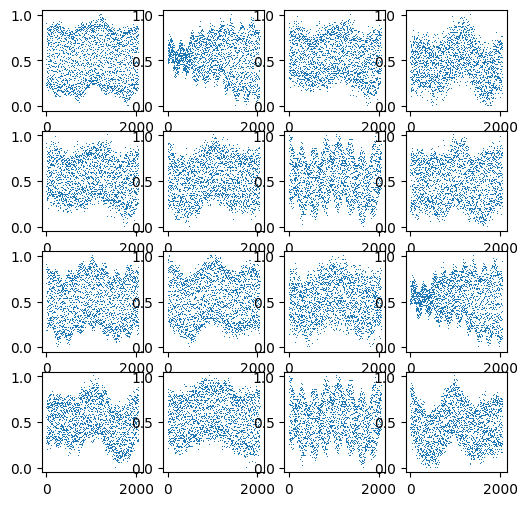

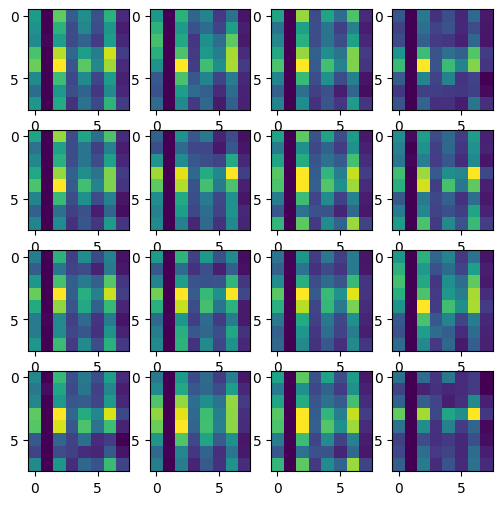

cluster 20
N samples: 52


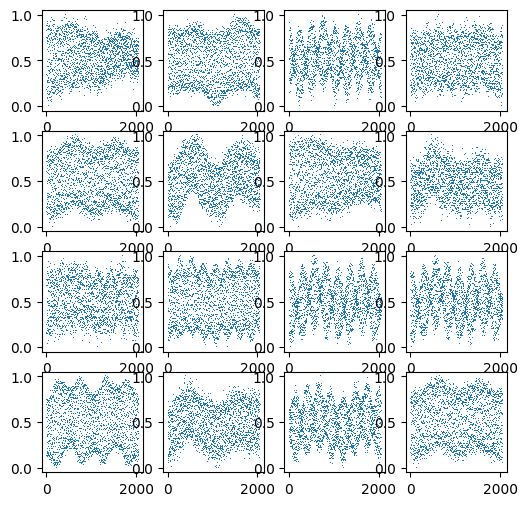

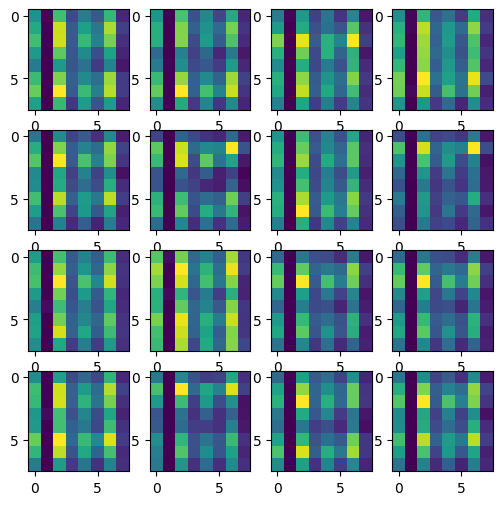

In [68]:
kmeans = KMeans(n_clusters=viz.elbow_value_)
clustering = kmeans.fit(encoded_2d_norm)
print('-------------')
print("n_clusters:", viz.elbow_value_)
for cluster in np.unique(clustering.labels_):
    cluster_indices = np.where(clustering.labels_ == cluster)[0]
    print("cluster", cluster)
    print(f"N samples: {len(cluster_indices)}")
    cluster_indices = np.random.choice(cluster_indices,
                                       min(16, len(cluster_indices)))
    fig, axes = plot_clusters_grid(cluster_indices)
    plt.show()
    
    fig, axes = plot_cluster_imgs_grid(cluster_indices)
    plt.show()

In [ ]:
# from sklearn.cluster import DBSCAN
# dbscan = DBSCAN(eps=4)
# clustering = dbscan.fit(encoded_2d_tsne)
# sc = plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2, c=clustering.labels_, cmap='tab10')
# plt.legend(*sc.legend_elements())
# plt.show()
# for cluster in np.unique(clustering.labels_):
#     cluster_indices = np.where(clustering.labels_ == cluster)[0]
#     print("cluster", cluster)
#     fig, axes = plot_clusters(cluster_indices)
#     plt.show()
#     plot_avg_encoding(cluster_indices)
#     plt.show()